<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

# 1. Import libraries, classes, custom functions and data load</h1>

In [1]:
import sys
import os

# Get the directory path of the notebook
notebook_directory = os.path.dirname(os.path.abspath("__file__"))

# Get the directory path of the project (one level up)
project_directory = os.path.dirname(notebook_directory)

# Add the project directory to the Python module search path
sys.path.append(project_directory)

# Now you can import the LoadJSON module from DataLoaderLocal
from shared_utilities.DataLoaderLocal import LoadReviews

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, regexp_tokenize
from nltk.util import ngrams
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, MWETokenizer, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

import spacy
import utility_func as utils
from wordcloud import WordCloud
from langdetect import detect_langs
from gensim.models import Word2Vec
import xgboost as xgb
from langdetect import detect_langs
from tabulate import tabulate

# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# 2. Data Understanding

## 2.1 Data Source and Description

In [2]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
reviews = LoadReviews()
utils.YelpDatasets_Reviews(reviews_df = reviews)


Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
14,UBp0zWyH60Hmw6Fsasei7w,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4,0,2,0,The bun makes the Sonoran Dog. It's like a snu...,2011-10-27 17:12:05
75,ymhbOMW63B_vGaRFR3XT0A,yZdAhQ_KmKuCZmbBy9YDQg,5Ce3lZksYVkCbrihqylVHQ,5,0,0,0,I just started going to Sushi Nara this month ...,2014-07-25 17:56:26
93,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,Don't know what it is but If my tummy's feelin...,2012-02-01 14:21:25
147,ypFqmURIY41F4pWaMW1VrQ,hToW2eoTAYlOcuNz7I73Cg,7L1kXfwU5XM6f6Jxo_L7Yg,5,1,0,0,We've been coming here since I was a kid. The ...,2015-07-03 22:36:04


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341468 entries, 2 to 6990242
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    341468 non-null  object        
 1   user_id      341468 non-null  object        
 2   business_id  341468 non-null  object        
 3   stars        341468 non-null  int64         
 4   useful       341468 non-null  int64         
 5   funny        341468 non-null  int64         
 6   cool         341468 non-null  int64         
 7   text         341468 non-null  object        
 8   date         341468 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 26.1+ MB


In [4]:
reviews.describe()

,stars,useful,funny,cool
count,341468.000000,341468.000000,341468.000000,341468.000000
mean,3.720899,1.260833,0.302851,0.416575
std,1.542284,2.751193,1.170174,1.523648
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,236.000000,72.000000,130.000000


## 2.2 Exploratory Data Analysis

In [3]:
reviews = reviews.sample(n=5000, random_state=42)
display(reviews)
reviews.describe()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
3072330,0MFy30StA0Ns8ILccsowyA,S-cMvM-TbIg1oYMLPneoBg,43MDfrU28FYjfpamNfL9GA,4,2,0,0,Great food and environment. Loved the wine.\n\...,2013-11-30 22:31:33
3716689,LWER5lk9yGVoKr36yYxKsQ,RIXIoCTafjr1auUJkV3fLg,r6Unwg-mxv_3JrEjQ24_TQ,4,0,0,0,This Costco has very helpful staff and is alwa...,2014-06-06 23:02:11
6289074,pIdyWcCclKeplPN8D4Ft2A,a2DGFEIov1L7X9rKdVmN6A,xuYPogbBSHAtOebONVhprA,5,3,0,3,We have been coming here our whole lives and w...,2021-06-23 02:54:36
3245132,hWhJGNQEZRXWiBDp2XR2sw,DT0Elf41cptTnuz16auxKQ,lC0_e8F1zAstzhj-O3eQZg,5,0,0,0,This place is a must when you come Tucson! I'm...,2020-01-23 20:10:01
442448,fOKCRjS5DMGj4uCKvkcNUA,7F7Z-PCZjfxie15f9vl8ww,8QJTzIaR5FceGds8HBSIig,5,0,0,0,We loved our visit at Barrio today. They had a...,2017-09-17 22:39:09
...,...,...,...,...,...,...,...,...,...
236771,5sWrHQ_AsMuDicnUfxgcTA,IpPaKPBHAEY93YgeqMH-yA,UCMSWPqzXjd7QHq7v8PJjQ,5,1,0,1,This place is great!!! The food is delicious a...,2015-06-04 19:47:53
6296732,q93mZM3HMm8YaZL8iKhqyA,3MYdpmHeNwC6FquRWi3YOg,2njTjQ35skXN171KoobeGg,3,0,0,0,Decent espresso did nothing to ward off sleepi...,2005-08-27 18:54:38
3509165,CDiN6nS4j9AuoEfPf_g7Dw,Q5VPHiyTbJpU9oYdmDdf8A,jpLJ79SPYXMpbvZ0py3uiw,5,0,0,0,I've been coming here for years when they were...,2016-02-24 06:35:36
887201,KIP91UfX9AV1ep5hUjNU6g,VD05erN-XNv7wnL4CwkISw,pAoBDKK060h1a9uA1tn6Lw,5,0,0,0,"Cold beer and good times, this may be our go-t...",2016-08-05 20:43:35


,stars,useful,funny,cool
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.724400,1.290200,0.303200,0.413000
std,1.537308,2.866152,1.289342,1.279671
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,67.000000,32.000000,45.000000


### 2.2.1 Distribution of reviews and stars

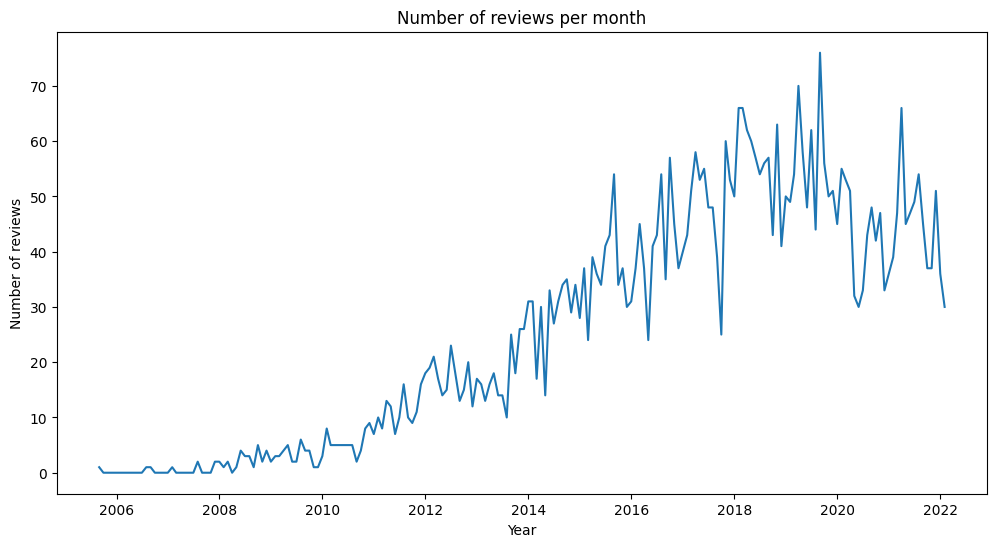

In [6]:
reviews['date'] = pd.to_datetime(reviews['date'])
df = reviews.set_index('date')

# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['text'].resample('M').count())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per month')

# Show the graph
plt.show()

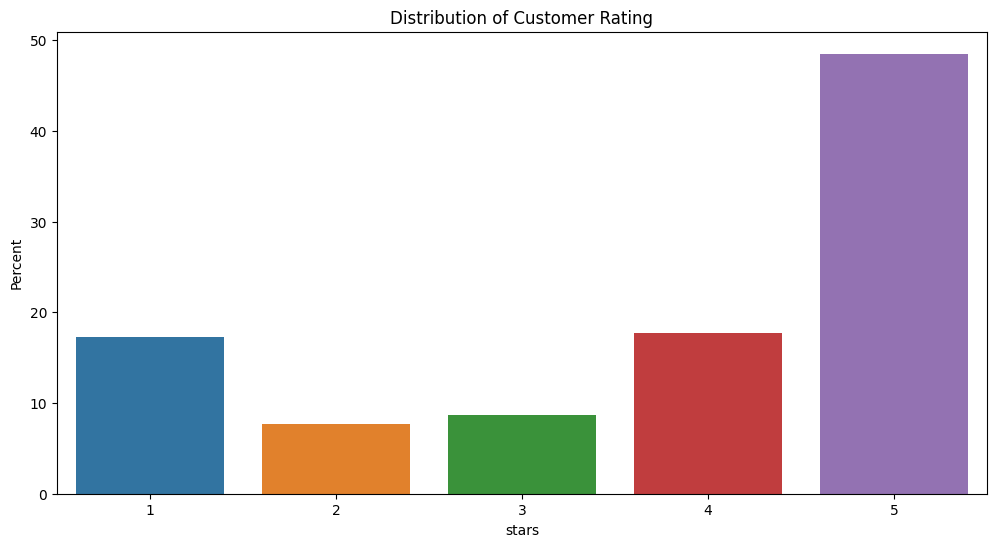

In [7]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the bar chart
ax = sns.barplot(data=reviews, x='stars', y='stars', estimator=lambda x: len(x) / len(reviews) * 100)

# Remove the grids
ax.grid(False)

# Set the ylabel, title and display the graph
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Rating')
plt.show()

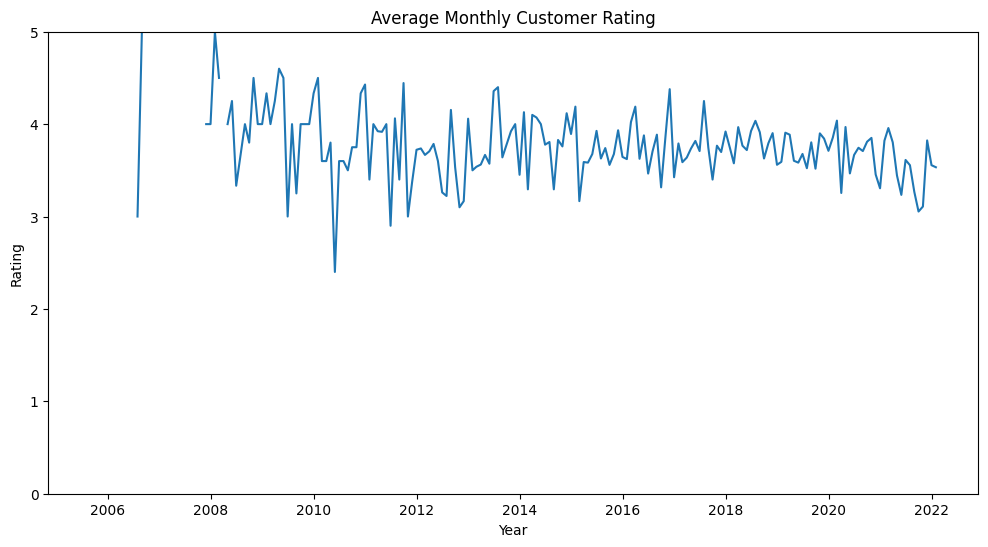

In [8]:
# Set the background to white
plt.figure(figsize=(12, 6))
plt.rcParams['axes.facecolor'] = 'white' # Set background to white

# Create the line graph
plt.plot(df['stars'].resample('M').mean())

# Remove the grids
plt.grid(False)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Monthly Customer Rating')
plt.ylim(0, 5)

# Show the graph
plt.show()

 ### 2.2.2 Text Length

#### 2.2.2.1 To get an insight on the length of each review, we can create a new column in yelp called text length. This column will store the number of characters in each review.

In [9]:
reviews['text length'] = reviews['text'].apply(len)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text length
3072330,0MFy30StA0Ns8ILccsowyA,S-cMvM-TbIg1oYMLPneoBg,43MDfrU28FYjfpamNfL9GA,4,2,0,0,Great food and environment. Loved the wine.\n\...,2013-11-30 22:31:33,245
3716689,LWER5lk9yGVoKr36yYxKsQ,RIXIoCTafjr1auUJkV3fLg,r6Unwg-mxv_3JrEjQ24_TQ,4,0,0,0,This Costco has very helpful staff and is alwa...,2014-06-06 23:02:11,266
6289074,pIdyWcCclKeplPN8D4Ft2A,a2DGFEIov1L7X9rKdVmN6A,xuYPogbBSHAtOebONVhprA,5,3,0,3,We have been coming here our whole lives and w...,2021-06-23 02:54:36,423
3245132,hWhJGNQEZRXWiBDp2XR2sw,DT0Elf41cptTnuz16auxKQ,lC0_e8F1zAstzhj-O3eQZg,5,0,0,0,This place is a must when you come Tucson! I'm...,2020-01-23 20:10:01,155
442448,fOKCRjS5DMGj4uCKvkcNUA,7F7Z-PCZjfxie15f9vl8ww,8QJTzIaR5FceGds8HBSIig,5,0,0,0,We loved our visit at Barrio today. They had a...,2017-09-17 22:39:09,176


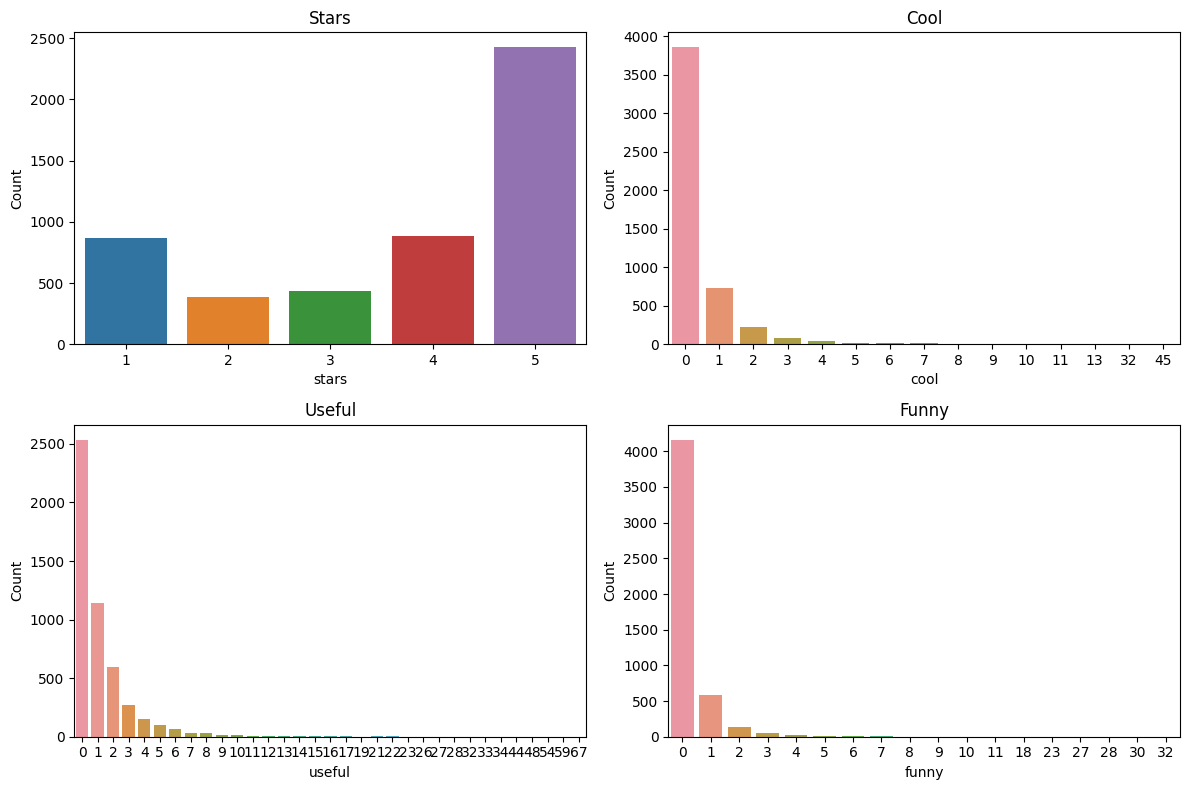

In [10]:
# Set the background as white
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')  # Define o fundo como branco

# Subplot 1
axes1 = plt.subplot(2, 2, 1)
axes1 = sns.countplot(x='stars', data=reviews)
axes1.set_title('Stars')
axes1.set_ylabel('Count')

# Subplot 2
axes2 = plt.subplot(2, 2, 2)
axes2 = sns.countplot(x='cool', data=reviews)
axes2.set_title('Cool')
axes2.set_ylabel('Count')

# Subplot 3
axes3 = plt.subplot(2, 2, 3)
axes3 = sns.countplot(x='useful', data=reviews)
axes3.set_title('Useful')
axes3.set_ylabel('Count')

# Subplot 4
axes4 = plt.subplot(2, 2, 4)
axes4 = sns.countplot(x='funny', data=reviews)
axes4.set_title('Funny')
axes4.set_ylabel('Count')

plt.tight_layout()

# Remova all the grids
for ax in [axes1, axes2, axes3, axes4]:
    ax.grid(False)

# Show all the plots
plt.show()

#### 2.2.2.2 Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between our newly created text length feature and the stars rating.

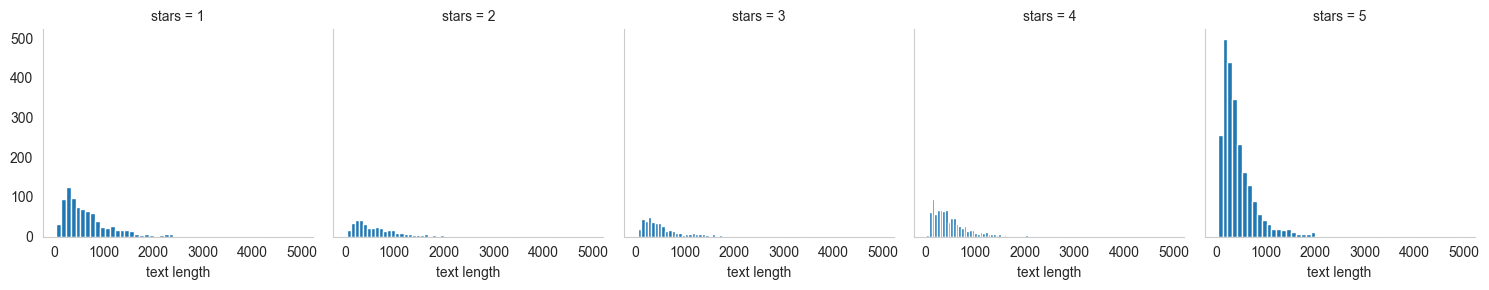

In [11]:
# Configuração do estilo do seaborn para definir o fundo como branco
sns.set_style("whitegrid")

# Crie o FacetGrid
g = sns.FacetGrid(data=reviews, col='stars')

# Mapeie o histograma
g.map(plt.hist, 'text length', bins=50)

# Remova as grades em todos os subplots
for ax in g.axes.flat:
    ax.grid(False)

# Exiba o FacetGrid
plt.show()

c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


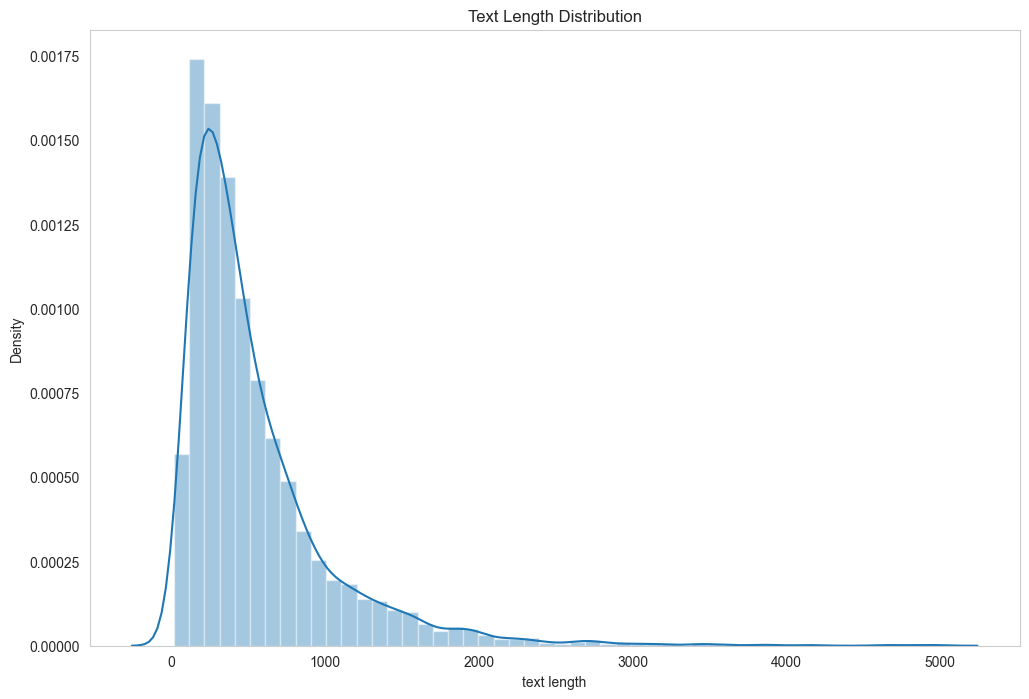

In [12]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the distribution graph
sns.distplot(reviews['text length'], kde=True, bins=50)

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution')

# Display the graph
plt.show()

#### 2.2.2.3 Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

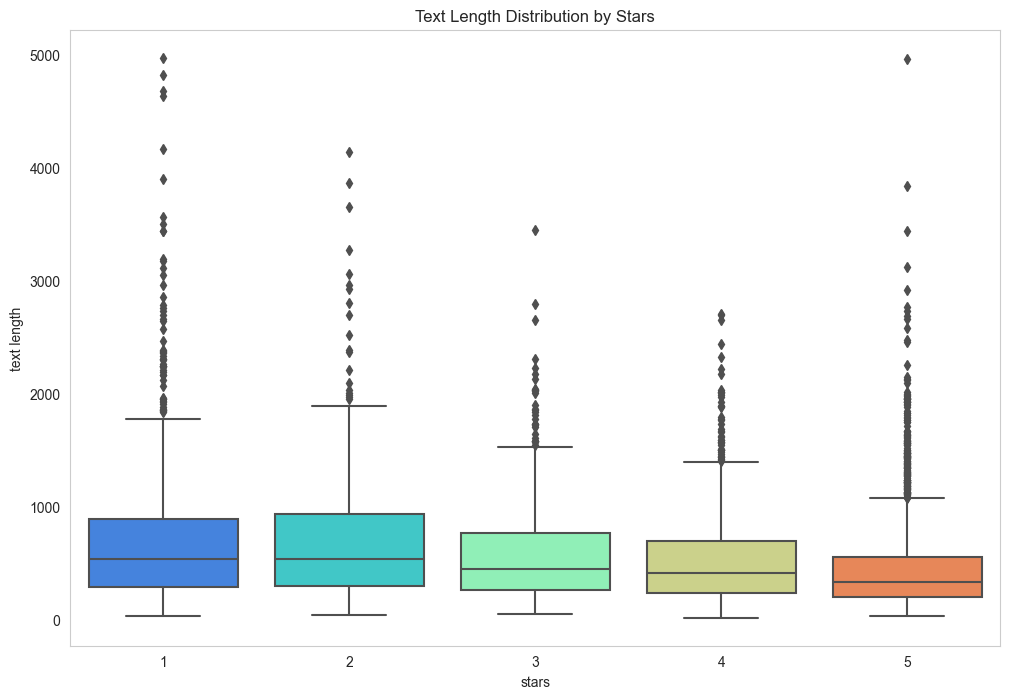

In [13]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Create the box plot
sns.boxplot(x='stars', y='text length', data=reviews, palette='rainbow')

# Remove the grids
plt.grid(False)

# Add the title
plt.title('Text Length Distribution by Stars')

# Display the graphic
plt.show()

#### 2.2.2.4 Let’s group the data by the star rating, and see if we can find a correlation between features such as cool, useful, and funny. We can use the .corr()method from Pandas to find any correlations in the dataframe.

In [14]:
stars = reviews.groupby('stars').mean()
stars.corr()

,useful,funny,cool,text length
useful,1.000000,0.942136,-0.801202,0.809880
funny,0.942136,1.000000,-0.816845,0.925339
cool,-0.801202,-0.816845,1.000000,-0.926797
text length,0.809880,0.925339,-0.926797,1.000000


#### 2.2.2.5 To visualise these correlations, we can use Seaborn’s heatmap. Looking at the map, funny is strongly correlated with useful, and usefulseems strongly correlated with text length. We can also see a negative correlation between cool and the other three features.

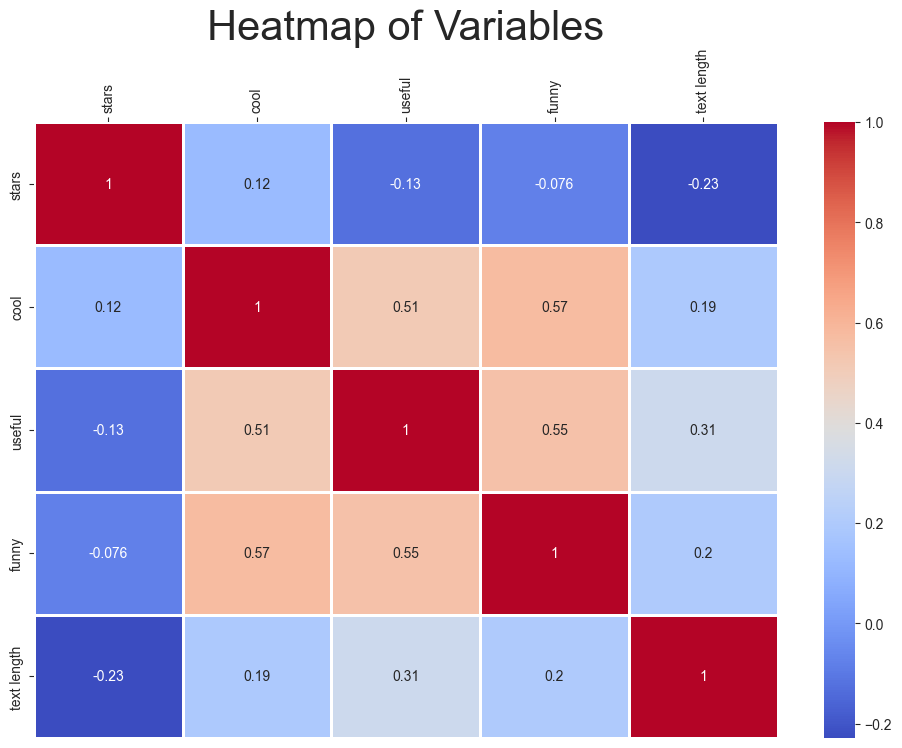

In [15]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the heatmap graphic
yelp_cor = reviews[['stars', 'cool', 'useful', 'funny', 'text length']].corr()

fig = plt.figure(figsize=(12, 8))
axes = sns.heatmap(yelp_cor, cmap='coolwarm', linewidth=1, linecolor='white', annot=True)

# Remove the grids
axes.xaxis.set_ticks_position('top')
axes.xaxis.set_tick_params(rotation=90)
axes.yaxis.set_ticks_position('left')

# Add the title
axes.set_title('Heatmap of Variables', fontsize=30)

# Display the graph
plt.show()

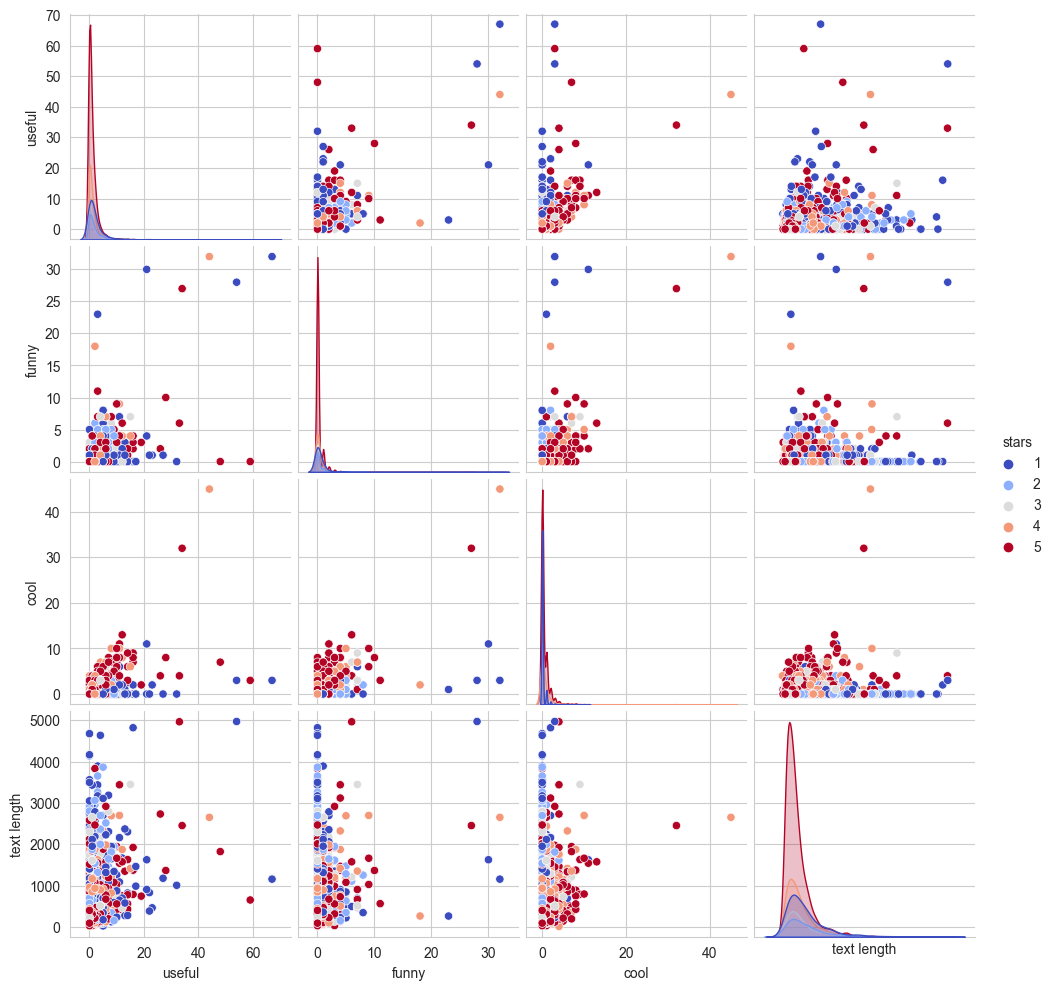

In [16]:
# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

# Create the pairplot graph
sns.pairplot(reviews, hue='stars', palette='coolwarm')

# Remove the grids from the x and y axes
plt.xticks([])
plt.yticks([])

# Remove the grids
plt.grid(False)

# Display the graph
plt.show()

## 2.3 Data cleaning

### 2.3.1 Let's start by removing any non-alpha chars, using a regular expression. We'll create a separate corpus (a list of reviews), so that we leave the original dataset untouched.

In [4]:
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)
    return cleaned_text

# Apply the text cleaning function to the 'text' column of the reviews DataFrame
reviews['text'] = reviews['text'].apply(clean_text)

### 2.3.2 In the review, some character references such as “&amp;amp;” are not useful in our text content and we removed them.

In [5]:
reviews['text'] = [i.replace("&amp;amp;", '').replace("\'",'') for i in reviews['text']]

### 2.3.3 Next, we wanted to make sure all the reviews are in English and we did the language detection with a library called langdetect and the specific function detect_langs.

In [6]:
# Assuming reviews.text is a list of text data
languages = []

for text in reviews.text:
    try:
        detected_langs = detect_langs(text)
        top_lang = str(detected_langs[0]).split(':')[0]
        languages.append(top_lang)
    except:
        languages.append("Unknown")

reviews['language'] = languages

### 2.3.4 Next, we can convert all letters to lowercase, ensuring that words like "Amazing," "AMAZING," and "amazing" are all represented in the same way.

In [7]:
# Convert all letters to lowercase
reviews['text'] = reviews['text'].str.lower()

# 3. Text Mining

## 3.1 Stopwords

In [8]:
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['super', 'duper', 'place', 'br', 'href', 'good', 'great'])

## 3.2 Word Cloud

In [22]:
# concatenate all the reviews into one single string 
full_text = ' '.join(reviews['text'])
wordcloud = WordCloud( width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords=my_stop_words).generate(full_text)
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

ValueError: Only supported for TrueType fonts

### 3.2.1 Positive Reviews (4 and 5 Stars)

In [23]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([4, 5])]

# Concatenate the text of the filtered reviews into one single string
full_text_positive = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

### 3.2.2 Negative Reviews (1 and 2 Stars)

In [24]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([1, 2])]

# Concatenate the text of the filtered reviews into one single string
full_text_negative = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

### 3.2.3 Neutral Reviews (3 Stars)

In [25]:
# Filter the reviews DataFrame to include only reviews with star ratings 1 or 2
filtered_reviews = reviews[reviews['stars'].isin([3])]

# Concatenate the text of the filtered reviews into one single string
full_text_neutral = ' '.join(filtered_reviews['text'])

# Create the word cloud using the filtered text
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=my_stop_words
).generate(full_text)

# Plot the word cloud
fig = plt.figure(
    figsize=(10, 7),
    facecolor='k',
    edgecolor='k'
)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ValueError: Only supported for TrueType fonts

## 3.3 Tokenization and Vectorization

### 3.3.1 Bag-of-Words 

In [26]:
nltk.download('punkt')
word_tokens = word_tokenize(full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

word_pairs = list(ngrams(tokens, 2))

# Calculate the frequency distribution of pairs of 2 words
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20),columns=['Words', 'Frequency'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


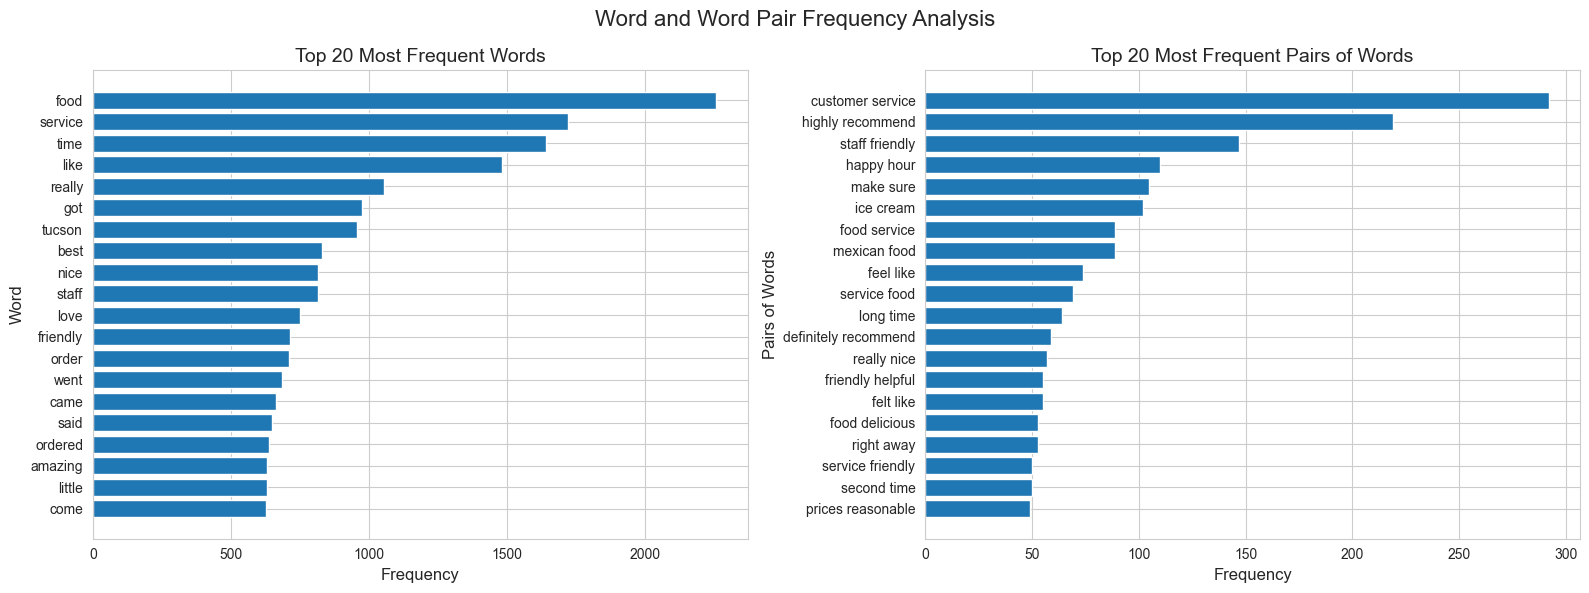

In [27]:
# Create a figure with two subplots (one for the top 20 words and one for the top 20 bigrams)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Plot the top 20 words
axes[0].barh(dist['Word'], dist['Frequency'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_ylabel('Word', fontsize=12)
axes[0].set_title('Top 20 Most Frequent Words', fontsize=14)

# Convert the tuples in 'dist_pair['Words']' to strings
bigram_strings = [' '.join(pair) for pair in dist_pair['Words']]

# Plot the top 20 bigrams
axes[1].barh(bigram_strings, dist_pair['Frequency'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_ylabel('Pairs of Words', fontsize=12)
axes[1].set_title('Top 20 Most Frequent Pairs of Words', fontsize=14)

# Adjust the spacing between subplots
plt.suptitle('Word and Word Pair Frequency Analysis', fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

#### 3.3.1.1 Stemming - Stemming is a technique that aims to remove the suffixes from a word to find its root (or "stem"). The goal is to group words with similar forms, even if they are not the same word. 

In [28]:
porter = PorterStemmer()
stemmed_tokens =[porter.stem(word) for word in tokens]
stemmed_token_dist = FreqDist(stemmed_tokens)
stemmed_dist = pd.DataFrame(stemmed_token_dist.most_common(20),columns=['Word', 'Frequency'])

# Aplicar stemming aos pares de palavras (bigrams)
stemmed_bigram_dist = FreqDist([(porter.stem(word1), porter.stem(word2)) for word1, word2 in word_pairs])
stemmed_dist_pair = pd.DataFrame(stemmed_bigram_dist.most_common(20), columns=['Words', 'Frequency'])

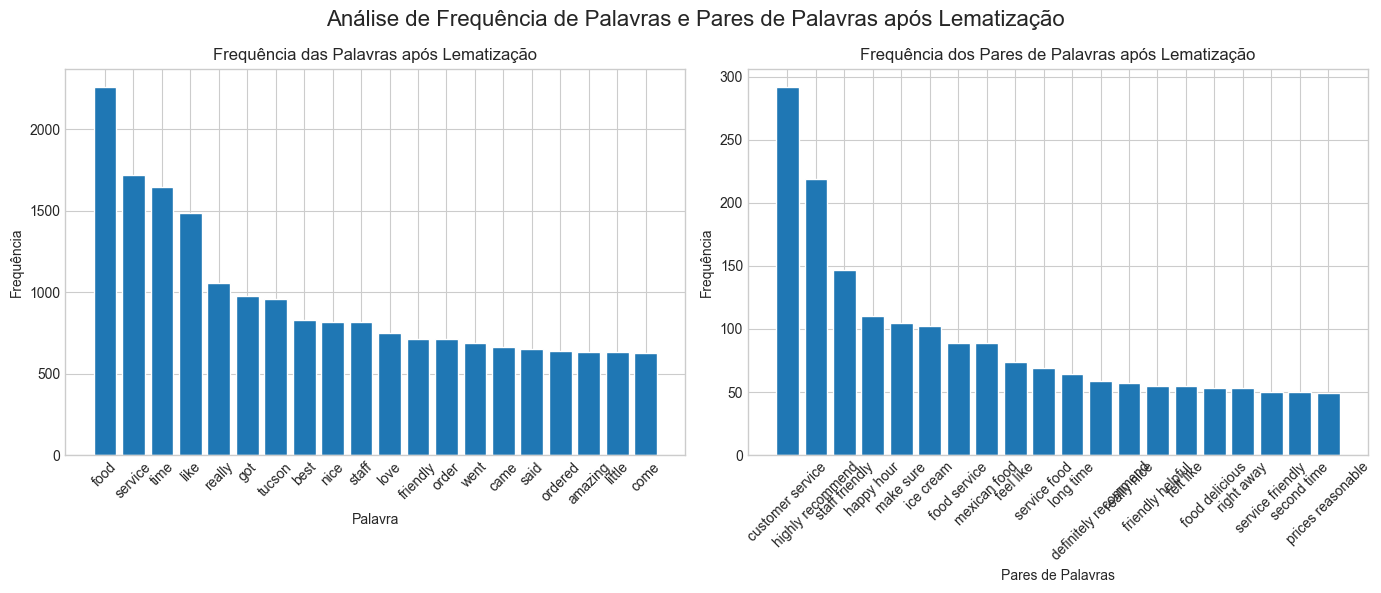

In [29]:
# Defina o estilo de fundo como 'seaborn-whitegrid'
plt.style.use('seaborn-whitegrid')

# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

#### 3.3.1.2 Lemmatization - determine the base form of a word, called the "lemma," taking into account the grammatical structure and context of the word. This involves consulting a dictionary or a list of lemmas to find the correct base form of a word.

In [30]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

# Frequency of words after lemmatization
token_dist = FreqDist(lemmatized_tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Word pairs after lemmatization
word_pairs = list(ngrams(lemmatized_tokens, 2))
bigram_dist = FreqDist(word_pairs)
dist_pair = pd.DataFrame(bigram_dist.most_common(20), columns=['Words', 'Frequency'])

# If you wish, you can apply lemmatization to the word pairs (bigrams) as well, in the same way as you did with stemming.

# Results after lemmatization
print(dist)
print(dist_pair)

          Word  Frequency
0         food       2312
1         time       2005
2      service       1787
3         like       1504
4       really       1057
5          got        974
6       tucson        958
7         best        829
8        staff        823
9         nice        818
10       order        785
11        love        784
12         day        775
13        come        770
14  restaurant        754
15        make        720
16    friendly        714
17        went        685
18       price        678
19        came        663
                      Words  Frequency
0       (customer, service)        292
1       (highly, recommend)        219
2         (staff, friendly)        147
3             (happy, hour)        111
4              (make, sure)        108
5              (ice, cream)        104
6              (feel, like)         92
7           (food, service)         89
8           (mexican, food)         89
9           (service, food)         69
10              (year, ol

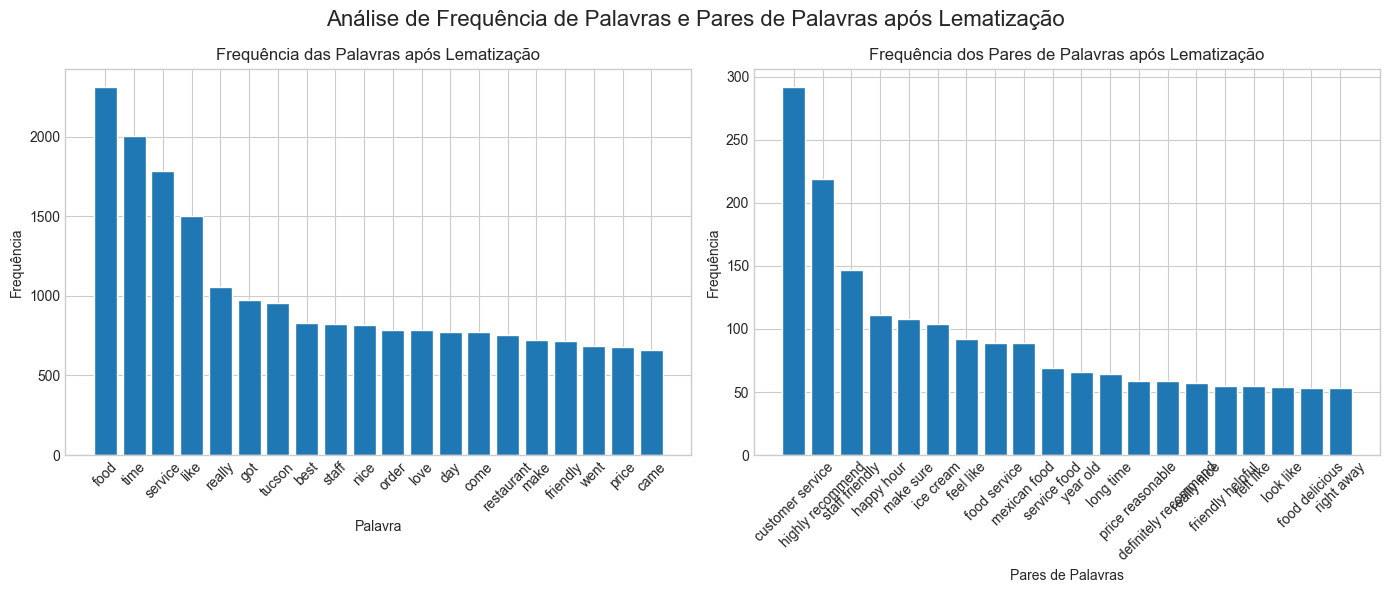

In [31]:
# Crie uma figura geral para os gráficos
plt.figure(figsize=(14, 6))

# Gráfico de barras para a frequência de palavras
plt.subplot(121)
plt.bar(dist['Word'], dist['Frequency'])
plt.title('Frequência das Palavras após Lematização')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Gráfico de barras para a frequência de pares de palavras
plt.subplot(122)
plt.bar(dist_pair['Words'].apply(lambda x: f"{x[0]} {x[1]}"), dist_pair['Frequency'])
plt.title('Frequência dos Pares de Palavras após Lematização')
plt.xlabel('Pares de Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

# Título geral acima dos gráficos
plt.suptitle('Análise de Frequência de Palavras e Pares de Palavras após Lematização', fontsize=16)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()

### 3.3.2 N-grams 

In [32]:
# Convert the set of stop words into a list
my_stop_words_list = list(my_stop_words)

# Create the vectorizer with the stop words as a list for bigrams
vect_bigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(2, 2))
bigrams = vect_bigrams.fit_transform(reviews['text'])
feature_names_bigrams = vect_bigrams.get_feature_names_out()
bigram_df = pd.DataFrame(bigrams.toarray(), columns=feature_names_bigrams)

# Create the vectorizer with the stop words as a list for trigrams
vect_trigrams = CountVectorizer(stop_words=my_stop_words_list, ngram_range=(3, 3))
trigrams = vect_trigrams.fit_transform(reviews['text'])
feature_names_trigrams = vect_trigrams.get_feature_names_out()
trigram_df = pd.DataFrame(trigrams.toarray(), columns=feature_names_trigrams)

# Calculate the total frequency of each bigram
bigram_frequency = pd.DataFrame(bigram_df.sum(axis=0)).reset_index()
bigram_frequency.columns = ['bigram', 'frequency']

# Calculate the total frequency of each trigram
trigram_frequency = pd.DataFrame(trigram_df.sum(axis=0)).reset_index()
trigram_frequency.columns = ['trigram', 'frequency']

# Sort the bigrams and trigrams by frequency in descending order and take the first 20
bigram_frequency = bigram_frequency.sort_values(by='frequency', ascending=False).head(20)
trigram_frequency = trigram_frequency.sort_values(by='frequency', ascending=False).head(20)

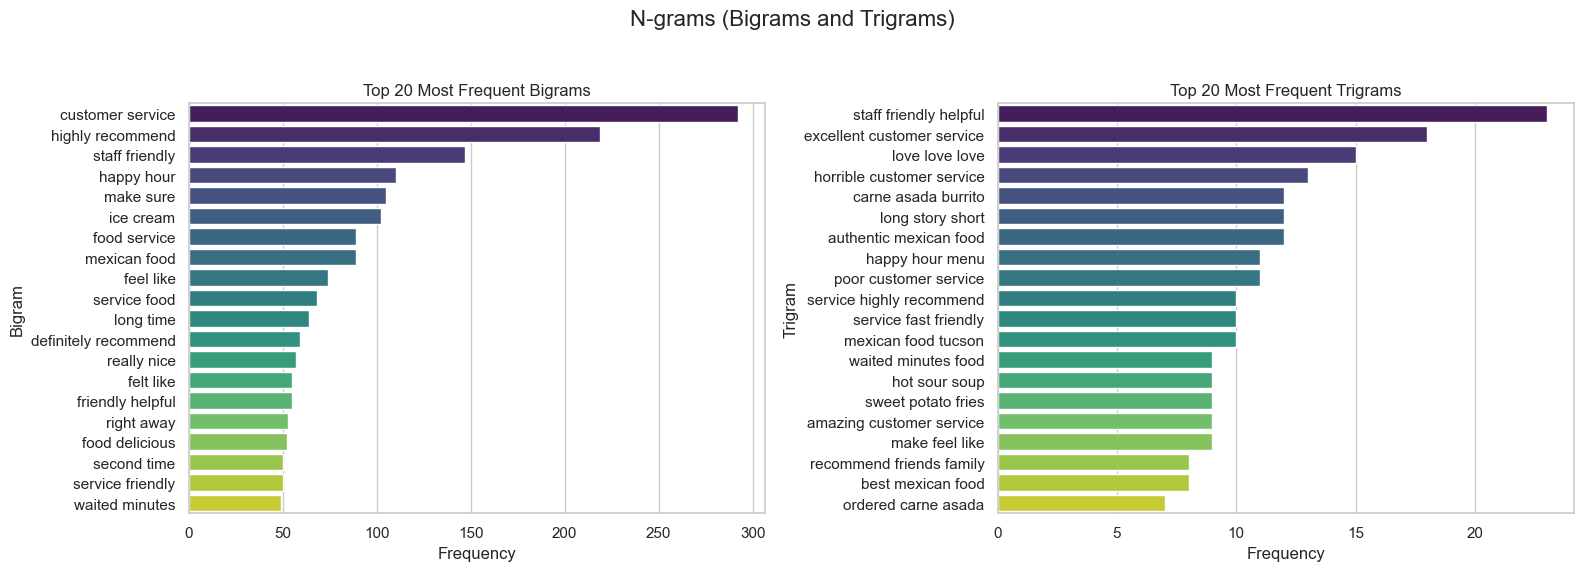

In [33]:
# Set the plot style (optional)
sns.set(style="whitegrid")

# Create subplots for bigrams and trigrams
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the bigrams
sns.barplot(x='frequency', y='bigram', data=bigram_frequency, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigram')
axes[0].set_title('Top 20 Most Frequent Bigrams')

# Plot the trigrams
sns.barplot(x='frequency', y='trigram', data=trigram_frequency, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigram')
axes[1].set_title('Top 20 Most Frequent Trigrams')

# Add a general title
fig.suptitle('N-grams (Bigrams and Trigrams)', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the top margin for the title
plt.show()

### 3.3.3 Word2Vec for vectorization

In [34]:
df_good = reviews[reviews['stars'] > 3].copy()
good_reviews = ' '.join(df_good.text)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [35]:
good_token_clean

[['food',
  'environment',
  'loved',
  'wine',
  'going',
  'dine',
  'stick',
  'burgers',
  'fries',
  'expect',
  'burger',
  'milkshakes',
  'avoid',
  'salads',
  'par',
  'costco',
  'helpful',
  'staff',
  'clean',
  'costco',
  'carries',
  'wide',
  'variety',
  'items',
  'change',
  'weekly',
  'excellent',
  'fresh',
  'meats',
  'vegetables',
  'bakery',
  'pre',
  'items',
  'parties',
  'selection',
  'alcohol',
  'wine',
  'beer',
  'available',
  'coming',
  'lives',
  'went',
  'couple',
  'years',
  'food',
  'filet',
  'mignon',
  'juicy',
  'tasty',
  'beans',
  'texas',
  'toast',
  'salsa',
  'salad',
  'salad',
  'basic',
  'favorite',
  'salad',
  'live',
  'music',
  'father',
  'day',
  'hit',
  'excellent',
  'band',
  'played',
  'service',
  'connie',
  'serving',
  'years',
  'years',
  'thanks',
  'remembering',
  'keeping',
  'happy',
  'come',
  'tucson',
  'conference',
  'colleagues',
  'point',
  'eat',
  'days',
  'row',
  'loved',
  'visit',
  'b

In [36]:
model_ted = Word2Vec(sentences=good_token_clean, vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('ok', 7.743652e-05),
 ('band', 7.7436496e-05),
 ('zealand', 7.7436445e-05),
 ('checca', 7.7436416e-05),
 ('basil', 7.7436394e-05),
 ('awesomesauce', 7.743632e-05),
 ('tomatoes', 7.743632e-05),
 ('connie', 7.7436256e-05),
 ('fluke', 7.7436256e-05),
 ('ms', 7.743625e-05)]

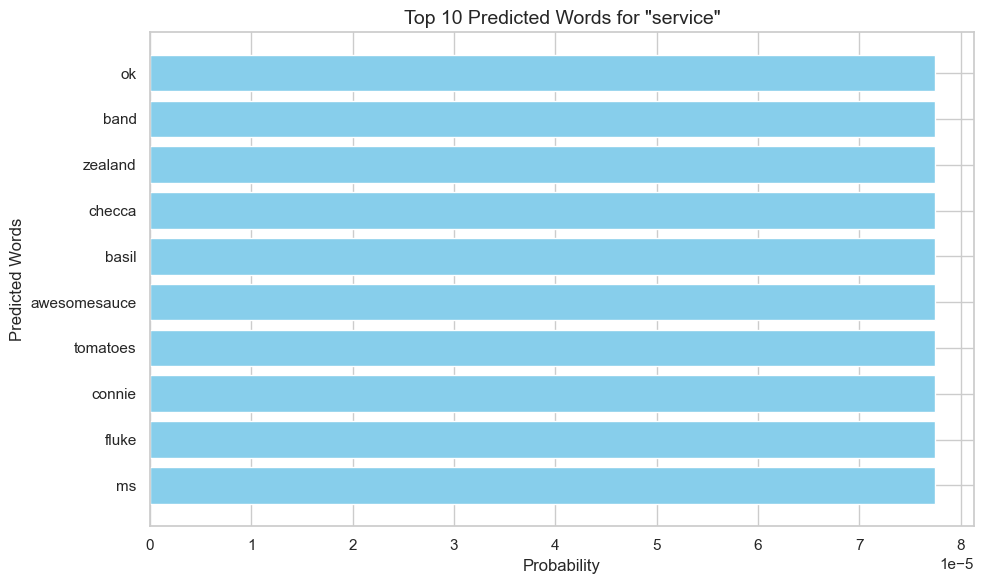

In [37]:
# Replace 'service' with the word you want to predict
target_word = 'service'

# Use the Word2Vec model to predict the top 10 words for the target word
predictions = model_ted.predict_output_word([target_word], topn=10)

# Extract the predicted words and their probabilities
predicted_words = [word for word, _ in predictions]
probabilities = [probability for _, probability in predictions]

# Create a bar chart to visualize the predictions
plt.figure(figsize=(10, 6))
plt.barh(predicted_words, probabilities, color='skyblue')
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Predicted Words', fontsize=12)
plt.title(f'Top 10 Predicted Words for "{target_word}"', fontsize=14)
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()

### 3.3.4 Spacy

In [38]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Assuming 'full_text' contains your text data
doc = nlp(full_text[:1000])

# Initialize a list to store tokens
tokens = []

# Iterate through the spaCy doc
for token in doc:
    # Check if the token is a valid word (alpha) and not in your stop words
    if token.is_alpha and token.text not in my_stop_words:
        tokens.append(token.text)
        print(token.text, token.lemma_)

# Calculate the frequency distribution of tokens
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

food food
environment environment
loved love
wine wine
going go
dine dine
stick stick
burgers burger
fries fry
expect expect
burger burger
milkshakes milkshake
avoid avoid
salads salad
par par
costco costco
helpful helpful
staff staff
clean clean
costco costco
carries carry
wide wide
variety variety
items item
change change
weekly weekly
excellent excellent
fresh fresh
meats meat
vegetables vegetable
bakery bakery
pre pre
items item
parties party
selection selection
alcohol alcohol
wine wine
beer beer
available available
coming come
lives life
went go
couple couple
years year
food food
filet filet
mignon mignon
juicy juicy
tasty tasty
beans bean
texas texas
toast toast
salsa salsa
salad salad
salad salad
basic basic
favorite favorite
salad salad
live live
music music
father father
day day
hit hit
excellent excellent
band band
played play
service service
connie connie
serving serve
years year
years year
thanks thank
remembering remember
keeping keep
happy happy
come come
tucson tucson
c

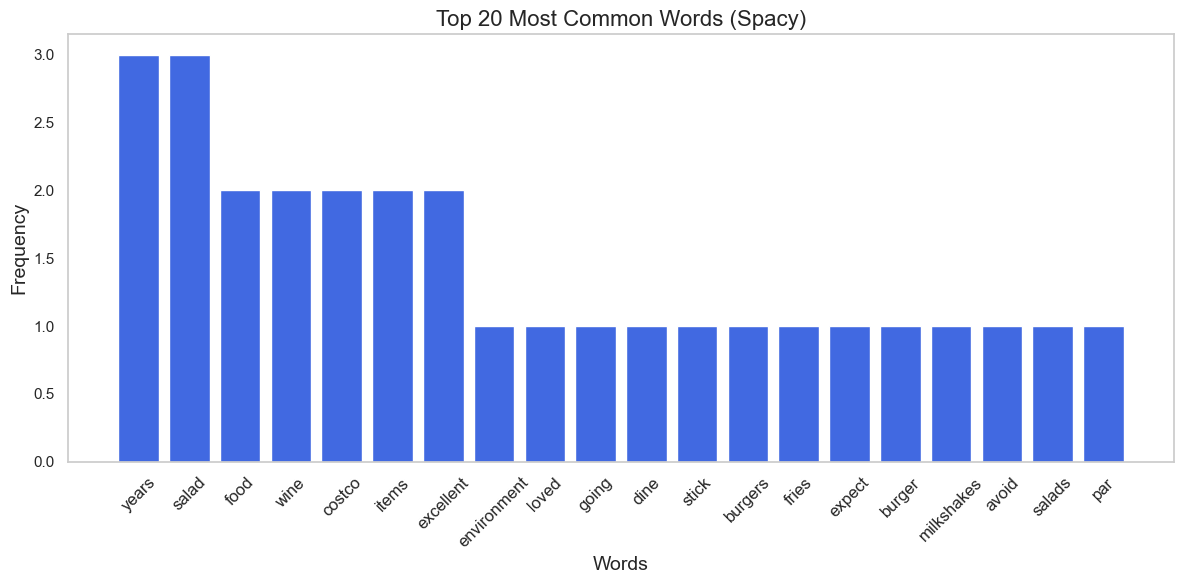

In [39]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Spacy)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.5 Making use of regular expressions

In [40]:
# Define your pattern for tokenization
pattern = r'''(?x)           # set flag to allow verbose regexps
        (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
        | \w+(?:-\w+)*       # words with optional internal hyphens
        | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
        | \.\.\.             # ellipsis
        | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
        '''

# Tokenize the text using the specified pattern
tokens = regexp_tokenize(full_text, pattern)

# Filter and clean the tokens (remove non-alphanumeric and stopwords)
filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in my_stop_words]

# Calculate the frequency distribution of tokens
token_dist = FreqDist(filtered_tokens)

# Create a DataFrame with the top 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform further analysis
print(dist)

        Word  Frequency
0       food       2260
1    service       1722
2       time       1644
3       like       1483
4     really       1057
5        got        963
6     tucson        957
7       best        829
8       nice        818
9      staff        817
10      love        751
11  friendly        714
12     order        710
13      went        685
14      came        663
15      said        649
16   ordered        639
17   amazing        632
18    little        631
19      come        626


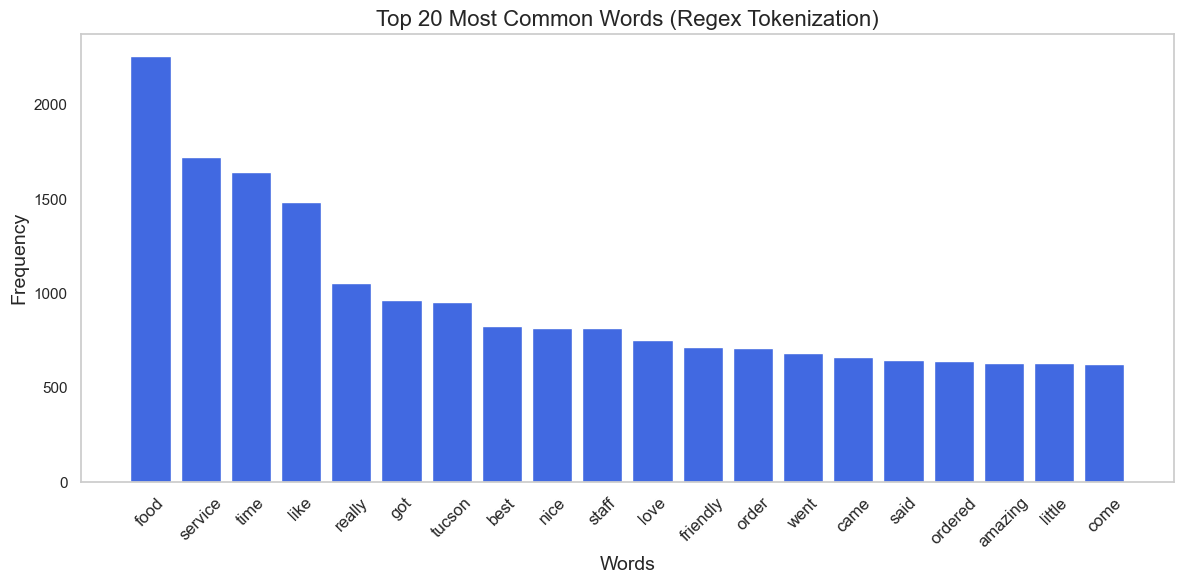

In [41]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart with a white background
ax.bar(dist['Word'], dist['Frequency'], color='#4169E1')

# Set the background color to white
ax.set_facecolor('white')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, fontsize=12)

# Add labels and title
ax.set_xlabel('Words', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 20 Most Common Words (Regex Tokenization)', fontsize=16)

# Remove the gray gridlines
ax.grid(False)

# Display the graph
plt.tight_layout()
plt.show()

### 3.3.6 Dealing with multi-word expressions (MWE)

In [42]:
# Suppose 'full_text' contains your text data
doc = nlp(full_text[:1000]) # Process the first 1000 characters of the text

# Initialize an MWETokenizer
mwe_tokenizer = MWETokenizer()

# Initialize lists to store sentences and tokens
sentences = []
tokens = []

# Iterate through the sentences in the spaCy document
for sent in doc.sents:
    sentence_text = sent.text
    sentences.append(sentence_text)
    
    # Tokenize the sentence using MWETokenizer
    sentence_tokens = mwe_tokenizer.tokenize(sentence_text.split())
    
    # Filter and clean tokens (remove non-alphanumerics and stopwords)
    filtered_sentence_tokens = [token.lower() for token in sentence_tokens if token.lower() not in my_stop_words]
    
    # Add filtered tokens to the token list
    tokens.extend(filtered_sentence_tokens)

# Calculate the frequency distribution of the tokens
token_dist = FreqDist(tokens)

# Create a DataFrame with the 20 most common words and their frequencies
dist = pd.DataFrame(token_dist.most_common(20), columns=['Word', 'Frequency'])

# Print the DataFrame or perform additional analysis
print(dist)

           Word  Frequency
0         years          3
1         salad          3
2          food          2
3          wine          2
4        costco          2
5         items          2
6     excellent          2
7   environment          1
8         loved          1
9         going          1
10         dine          1
11        stick          1
12      burgers          1
13        fries          1
14       expect          1
15       burger          1
16   milkshakes          1
17        avoid          1
18       salads          1
19          par          1


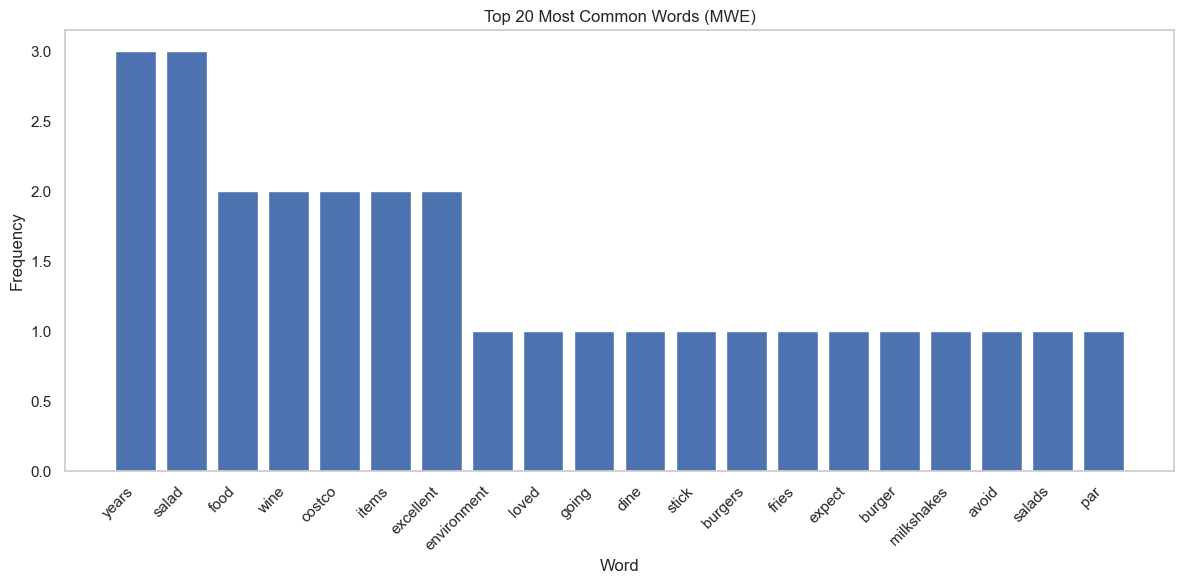

In [43]:
# Criar um gráfico de barras com fundo branco e sem grades
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('white')  # Define o fundo do gráfico como branco
plt.grid(False)  # Remove as grades
plt.bar(dist['Word'], dist['Frequency'])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words (MWE)')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 4. Sentiment Analysis

## 4.1 Lexicon-based Tool — VADER

In [44]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

n_samples = 100
reviews_vader = reviews.sample(n=n_samples, random_state=42)

# COnvert the column 'date' to datetime
reviews_vader['date'] = pd.to_datetime(reviews_vader['date'])
# Create 'target' column based on the specified conditions
reviews_vader['target'] = reviews_vader['stars'].apply(lambda rating: 1 if rating > 3 else (-1 if rating < 3 else 0))

# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = reviews_vader['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])

# Definir a coluna 'date' como índice
sentiment.index = reviews_vader['date']

# Agora você pode usar resample para calcular a média mensal
monthly_sentiment = sentiment.resample('M').mean()

# Now, add your code for evaluating sentiment analysis performance
y_pred = []
y = reviews_vader['target']
for rev in reviews_vader['text']:
    y_pred.append(1 if sid.polarity_scores(rev)['compound'] > 0 else 0)

#Save VADER reults
VADER_accuracy = accuracy_score(y, y_pred)
VADER_precision = precision_score(y, y_pred, average='weighted')
VADER_recall = recall_score(y, y_pred, average='weighted')
VADER_f1 = f1_score(y, y_pred, average='weighted')

print('Accuracy: ', VADER_accuracy)
print('Precision: ', VADER_precision)
print('Recall: ', VADER_recall)
print('F1: ', VADER_f1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy:  0.66
Precision:  0.5130474333983106
Recall:  0.66
F1:  0.5757347480106101


c:\Users\Karim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


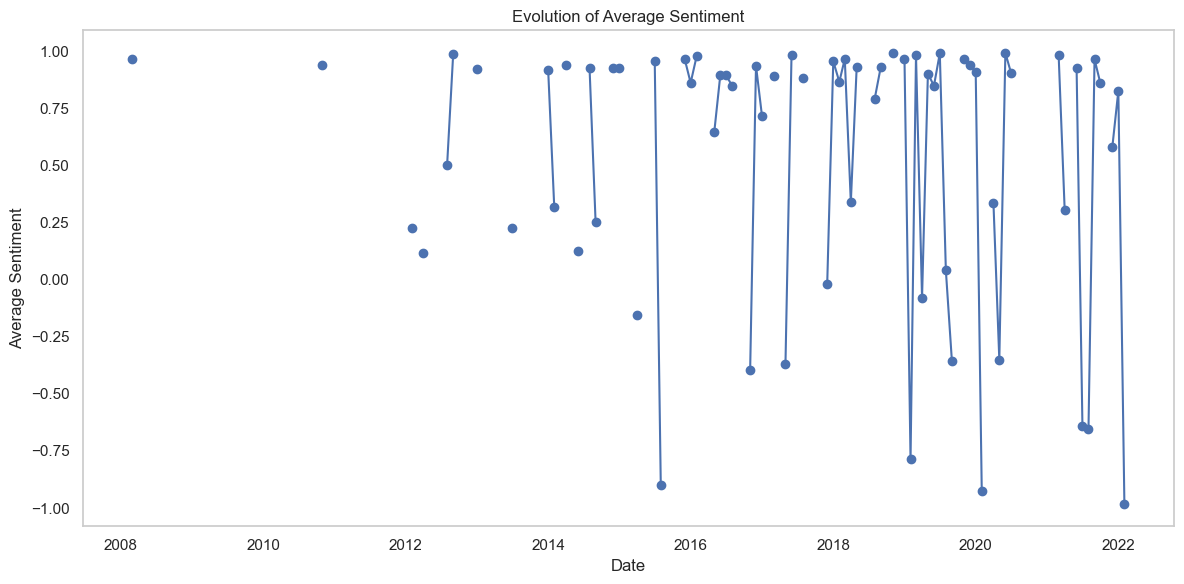

In [45]:
# Plot the monthly sentiment scores
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-')
ax.set_title('Evolution of Average Sentiment')  
ax.set_xlabel('Date')  
ax.set_ylabel('Average Sentiment')  
ax.grid(False)

# Format the x-axis to show only the years
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y"))

# Set the background color to white
ax.set_facecolor('white')

# Show the graph
plt.tight_layout()
plt.show()

## 4.2 Supervised Learning Classifiers

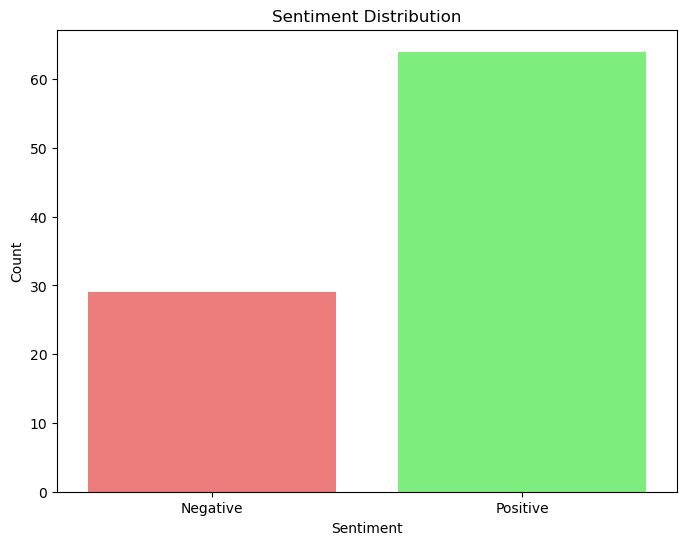

In [9]:
n_samples = 100
df = reviews.sample(n=n_samples, random_state=42)
df = df[df['stars'] != 3]
df['sentiment'] = df['stars'].apply(lambda rating : +1 if rating > 3 else -1)

# Count the number of samples for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Define custom colors
colors = ['#FF6B6B', '#6BFF6B']

# Create a bar chart with custom colors and labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

### 4.2.1 CountVectorizer 

In [10]:
# vectorization
vect = CountVectorizer(max_features=300, stop_words='english')
vect.fit(df.text)
X = vect.transform(df.text)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 300), (28, 300), (65,), (28,))

#### 4.2.1.1 Logistic Regression

In [11]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_CV = logreg.score(X_train, y_train) #Use for results
test_score_CV = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_CV}")
print(f"Score on test set: {test_score_CV}")

Score on training set: 1.0
Score on test set: 0.8214285714285714


In [12]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_CV = pd.DataFrame(con_mat_lr_CV, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,4,5
True 1,0,19


The Classification report for Logistic Regression


,precision,recall,f1-score,support
-1,1.000000,0.444444,0.615385,9.000000
1,0.791667,1.000000,0.883721,19.000000
accuracy,0.821429,0.821429,0.821429,0.821429
macro avg,0.895833,0.722222,0.749553,28.000000
weighted avg,0.858631,0.821429,0.797470,28.000000


In [13]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.1, random_state=1))])

In [14]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The confusion matrix for logistic regression')
con_mat_lr_final_CV = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_CV = pd.DataFrame(con_mat_lr_final_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_CV)

# Creation of the ranking report
print('The classification report for the logistic regression')
report_lr_final_CV = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_CV = pd.DataFrame(report_lr_final_CV).transpose()
df_First_Approach_Logistics_Regression_Pipeline = df_report_lr_final_CV
display(df_report_lr_final_CV)

Score on training set: 1.0
Score on test set: 0.8571428571428571
The confusion matrix for logistic regression


,Predicted 0,Predicted 1
True 0,5,4
True 1,0,19


The classification report for the logistic regression


,precision,recall,f1-score,support
-1,1.000000,0.555556,0.714286,9.000000
1,0.826087,1.000000,0.904762,19.000000
accuracy,0.857143,0.857143,0.857143,0.857143
macro avg,0.913043,0.777778,0.809524,28.000000
weighted avg,0.881988,0.857143,0.843537,28.000000


#### 4.2.1.2 Random Forest

In [15]:
my_random_forest_CV = RandomForestClassifier(random_state=1)
my_random_forest_CV.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_CV.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_CV.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.6428571428571429


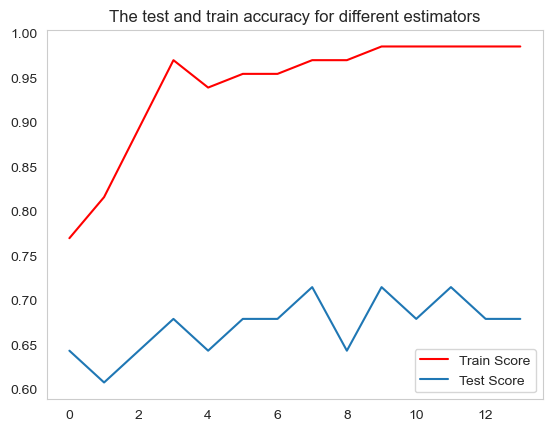

8


In [16]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 12, the both train and test accuracy are increased.

In [17]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [18]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_cv = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_cv = pd.DataFrame(con_mat_rf_cv, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_cv)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_cv = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_cv = pd.DataFrame(report_rf_cv).transpose()
df_First_Approach_Random_Forest_Pipeline = df_report_lr_cv
display(df_report_lr_cv)

The Confusion Matrix for Random Forest


,Predicted 0,Predicted 1
True 0,2,7
True 1,2,17


The Classification Report for Random Forest


,precision,recall,f1-score,support
-1,0.500000,0.222222,0.307692,9.000000
1,0.708333,0.894737,0.790698,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.604167,0.558480,0.549195,28.000000
weighted avg,0.641369,0.678571,0.635446,28.000000


#### 4.2.1.3 XGBoost

In [19]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_CV = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_CV.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_CV.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_CV.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9538461538461539
XG Boost test score: 0.7857142857142857


In [20]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_CV = confusion_matrix(y_test_mapped, XGB_model_CV.predict(X_test))
df_cm_xgb_CV = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_CV)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
display(df_report_xgb_CV)

The Confusion Matrix for XGBoost


,Predicted 0,Predicted 1
True 0,5,4
True 1,2,17


The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.714286,0.555556,0.625000,9.000000
1,0.809524,0.894737,0.850000,19.000000
accuracy,0.785714,0.785714,0.785714,0.785714
macro avg,0.761905,0.725146,0.737500,28.000000
weighted avg,0.778912,0.785714,0.777679,28.000000


In [21]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=500,
                               n_

In [22]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_CV = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_CV.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_CV = XGB_model_CV.predict(X_test)

# Training score
train_score = XGB_model_CV.score(X_train, y_train_mapped)
test_score = XGB_model_CV.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_CV = confusion_matrix(y_test_mapped, y_pred_XGB_CV)
con_mat_XGB_CV = pd.DataFrame(con_mat_XGB_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_CV

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_CV = classification_report(y_test_mapped, XGB_model_CV.predict(X_test), output_dict=True)
df_report_xgb_CV = pd.DataFrame(report_xgb_CV).transpose()
df_First_Approach_XGBoost_Pipeline = df_report_xgb_CV
display(df_report_xgb_CV)

Score on training set: 0.9846153846153847
Score on test set: 0.8214285714285714
The Confusion Matrix for XGBoost
The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.750000,0.666667,0.705882,9.000000
1,0.850000,0.894737,0.871795,19.000000
accuracy,0.821429,0.821429,0.821429,0.821429
macro avg,0.800000,0.780702,0.788839,28.000000
weighted avg,0.817857,0.821429,0.818466,28.000000


#### 4.2.1.4 Naive Bayes

In [23]:
# Create and fit the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.9538461538461539
Score on test set: 0.75


In [24]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
display(df_report_nb_CV)

The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,6,3
True 1,4,15


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
-1,0.600000,0.666667,0.631579,9.00
1,0.833333,0.789474,0.810811,19.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.716667,0.728070,0.721195,28.00
weighted avg,0.758333,0.750000,0.753201,28.00


In [25]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [26]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_CV = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_CV = pd.DataFrame(con_mat_nb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_CV)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_CV = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_CV = pd.DataFrame(report_nb_CV).transpose()
df_First_Approach_Naive_Bayes_Pipeline = df_report_nb_CV
display(df_report_nb_CV)

Score on training set: 0.9538461538461539
Score on test set: 0.75
The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,6,3
True 1,4,15


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
-1,0.600000,0.666667,0.631579,9.00
1,0.833333,0.789474,0.810811,19.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.716667,0.728070,0.721195,28.00
weighted avg,0.758333,0.750000,0.753201,28.00


#### 4.2.1.5 Support Vector Machine

In [27]:
# Create and fit the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=1)
svm_model.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model.score(X_train, y_train)
test_score_svm = svm_model.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.7857142857142857


In [28]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
display(df_report_svm_CV)

The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,5,4
True 1,2,17


The Classification Report for SVM


,precision,recall,f1-score,support
-1,0.714286,0.555556,0.625000,9.000000
1,0.809524,0.894737,0.850000,19.000000
accuracy,0.785714,0.785714,0.785714,0.785714
macro avg,0.761905,0.725146,0.737500,28.000000
weighted avg,0.778912,0.785714,0.777679,28.000000


In [29]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [30]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_CV = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_CV.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_CV.predict(X_test)

# Training score
train_score_svm = svm_model_CV.score(X_train, y_train)
test_score_svm = svm_model_CV.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_CV = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_CV = pd.DataFrame(con_mat_svm_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_CV)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_CV = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_CV = pd.DataFrame(report_svm_CV).transpose()
df_First_Approach_SVM_Pipeline = df_report_svm_CV
display(df_report_svm_CV)

Score on training set: 0.9846153846153847
Score on test set: 0.75
The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,3,6
True 1,1,18


The Classification Report for SVM


,precision,recall,f1-score,support
-1,0.75,0.333333,0.461538,9.00
1,0.75,0.947368,0.837209,19.00
accuracy,0.75,0.750000,0.750000,0.75
macro avg,0.75,0.640351,0.649374,28.00
weighted avg,0.75,0.750000,0.716458,28.00


### 4.2.2 TF-IDF Vectorization (Term Frequency-Inverse Document Frequency) 

In [31]:
tfidf_vect = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_vect.fit(df.text)
X_tfidf = tfidf_vect.transform(df.text)

X_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 300), (28, 300), (65,), (28,))

#### 4.2.2.1 Logistic Regression

In [32]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_TF_IDF = logreg.score(X_train, y_train)
test_score_TF_IDF = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_TF_IDF}")
print(f"Score on test set: {test_score_TF_IDF}")

Score on training set: 0.7230769230769231
Score on test set: 0.6785714285714286


In [33]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_TF_IDF = pd.DataFrame(con_mat_lr_TF_IDF, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_TF_IDF)
print('The Classification report for Logistic Regression')
report_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_TF_IDF = pd.DataFrame(report_TF_IDF).transpose()
df_report_TF_IDF

The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification report for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [34]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [35]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_TF_IDF = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_TF_IDF = pd.DataFrame(con_mat_lr_final_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_TF_IDF)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_TF_IDF = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_TF_IDF = pd.DataFrame(report_lr_final_TF_IDF).transpose()
df_Second_Approach_Logistic_Regression_Pipeline = df_report_lr_final_TF_IDF
display(df_report_lr_final_TF_IDF)

Score on training set: 1.0
Score on test set: 0.6785714285714286
The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report  for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


#### 4.2.1.2 Random Forest

In [36]:
my_random_forest_TF_IDF = RandomForestClassifier(random_state=1)
my_random_forest_TF_IDF.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_TF_IDF.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.6785714285714286


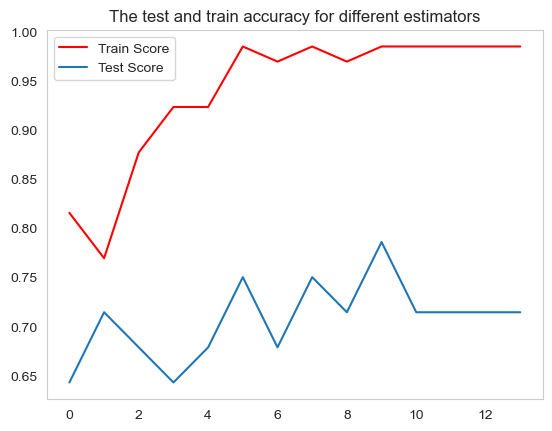

10


In [37]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [38]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [39]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_TF_IDF = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_TF_IDF = pd.DataFrame(con_mat_rf_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_TF_IDF)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_TF_IDF = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_TF_IDF = pd.DataFrame(report_rf_TF_IDF).transpose()
df_Second_Approach_Random_Forest_Pipeline = df_report_rf_TF_IDF
display(df_report_rf_TF_IDF)

The Confusion Matrix for Random Forest


,Predicted 0,Predicted 1
True 0,1,8
True 1,0,19


The Classification Report for Random Forest


,precision,recall,f1-score,support
-1,1.000000,0.111111,0.200000,9.000000
1,0.703704,1.000000,0.826087,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.851852,0.555556,0.513043,28.000000
weighted avg,0.798942,0.714286,0.624845,28.000000


#### 4.2.1.3 XGBoost

In [40]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_TF_IDF = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_TF_IDF.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_TF_IDF.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9692307692307692
XG Boost test score: 0.8214285714285714


In [41]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_TF_IDF = confusion_matrix(y_test_mapped, XGB_model_TF_IDF.predict(X_test))
df_cm_xgb_TF_IDF = pd.DataFrame(con_mat_xgb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_TF_IDF)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
display(df_report_xgb_TF_IDF)

The Confusion Matrix for XGBoost


,Predicted 0,Predicted 1
True 0,5,4
True 1,1,18


The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.833333,0.555556,0.666667,9.000000
1,0.818182,0.947368,0.878049,19.000000
accuracy,0.821429,0.821429,0.821429,0.821429
macro avg,0.825758,0.751462,0.772358,28.000000
weighted avg,0.823052,0.821429,0.810105,28.000000


In [42]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n

In [43]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_TF_IDF = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_TF_IDF.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_TF_ID = XGB_model_TF_IDF.predict(X_test)

# Training score
train_score = XGB_model_TF_IDF.score(X_train, y_train_mapped)
test_score = XGB_model_TF_IDF.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_TF_IDF = confusion_matrix(y_test_mapped, y_pred_XGB_TF_ID)
con_mat_XGB_TF_IDF = pd.DataFrame(con_mat_XGB_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_TF_IDF

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_TF_IDF = classification_report(y_test_mapped, XGB_model_TF_IDF.predict(X_test), output_dict=True)
df_report_xgb_TF_IDF = pd.DataFrame(report_xgb_TF_IDF).transpose()
df_Second_Approach_xgb_Pipeline = df_report_xgb_TF_IDF
display(df_report_xgb_TF_IDF)

Score on training set: 0.9846153846153847
Score on test set: 0.8214285714285714
The Confusion Matrix for XGBoost
The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.700000,0.777778,0.736842,9.000000
1,0.888889,0.842105,0.864865,19.000000
accuracy,0.821429,0.821429,0.821429,0.821429
macro avg,0.794444,0.809942,0.800853,28.000000
weighted avg,0.828175,0.821429,0.823715,28.000000


#### 4.2.1.4 Naive Bayes

In [44]:
# Create and fit the Naive Bayes model
naive_bayes_TF_IDF = MultinomialNB()
naive_bayes_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_TF_IDF.score(X_train, y_train)
test_score_NB = naive_bayes_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8615384615384616
Score on test set: 0.6785714285714286


In [45]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
display(df_report_nb_TF_IDF)

The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for Naive Bayes


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [46]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [47]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test)

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_TF_IDF = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_TF_IDF = pd.DataFrame(con_mat_nb_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_TF_IDF)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_TF_IDF = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_TF_IDF = pd.DataFrame(report_nb_TF_IDF).transpose()
df_Second_Approach_NB_Pipeline = df_report_nb_TF_IDF
display(df_report_nb_TF_IDF)

Score on training set: 1.0
Score on test set: 0.75
The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,4,5
True 1,2,17


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
-1,0.666667,0.444444,0.533333,9.00
1,0.772727,0.894737,0.829268,19.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.719697,0.669591,0.681301,28.00
weighted avg,0.738636,0.750000,0.734146,28.00


#### 4.2.1.5 Support Vector Machine

In [48]:
# Create and fit the SVM model
svm_model_TF_IDF = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.6785714285714286


In [49]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
display(df_report_svm_TF_IDF)

The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [50]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [51]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_TF_IDF = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_TF_IDF.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_TF_IDF.predict(X_test)

# Training score
train_score_svm = svm_model_TF_IDF.score(X_train, y_train)
test_score_svm = svm_model_TF_IDF.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_TF_IDF = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_TF_IDF = pd.DataFrame(con_mat_svm_TF_IDF, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_TF_IDF)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_TF_IDF = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_TF_IDF = pd.DataFrame(report_svm_TF_IDF).transpose()
df_Second_Approach_SVM_Pipeline = df_report_svm_TF_IDF
display(df_report_svm_TF_IDF)

Score on training set: 1.0
Score on test set: 0.7142857142857143
The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,1,8
True 1,0,19


The Classification Report for SVM


,precision,recall,f1-score,support
-1,1.000000,0.111111,0.200000,9.000000
1,0.703704,1.000000,0.826087,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.851852,0.555556,0.513043,28.000000
weighted avg,0.798942,0.714286,0.624845,28.000000


### 4.2.3 Word Embeddings - Word2Vec

In [52]:
sentences = [sent_tokenize(text) for text in df['text']]
# Suppose you want to tokenize sentences and words in the 'text' column of the 'df' DataFrame.
tokenized_sentences = []
for text in df['text']:
    sentences = sent_tokenize(text)
    sentence_tokens = [word_tokenize(sentence) for sentence in sentences]
    tokenized_sentences.extend(sentence_tokens)
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, sg=0)

X = [] # List to store the vector representations for each text

# For each text in 'df.text', tokenize the text into words and get the average vector representation of the words in the text
for text in df['text']:
    words = word_tokenize(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv] # Ignore words outside the model vocabulary
    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0) # Average vector representation of the text
        X.append(text_vector)

X = np.array(X) # Convert to a NumPy array

# Now 'X' contains your Word2Vec-based feature matrices, and 'y' contains your labels
y = df.sentiment

# Perform the division between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check class counts and shapes of training and testing sets
y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 100), (28, 100), (65,), (28,))

#### 4.2.3.1 Logistic Regression

In [53]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Word_2_VEC = logreg.score(X_train, y_train)
test_score_Word_2_VEC = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Word_2_VEC}")
print(f"Score on test set: {test_score_Word_2_VEC}")

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286


In [54]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Word_2_VEC = pd.DataFrame(con_mat_lr_Word_2_VEC, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_CV)
print('The Classification report for Logistic Regression')
report = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,4,5
True 1,0,19


The Classification report for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [55]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [56]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Word_2_VEC = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Word_2_VEC = pd.DataFrame(con_mat_lr_final_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Word_2_VEC)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Word_2_VEC = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Word_2_VEC = pd.DataFrame(report_lr_final_Word_2_VEC).transpose()
df_Third_Approach_Logistic_Regression_Pipeline = df_report_lr_final_Word_2_VEC
display(df_report_lr_final_Word_2_VEC)

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286
The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report  for Logistic Regression


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


#### 4.2.3.2 Random Forest

In [57]:
my_random_forest_Word_2_VEC = RandomForestClassifier(random_state=1)
my_random_forest_Word_2_VEC.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Word_2_VEC.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.6785714285714286


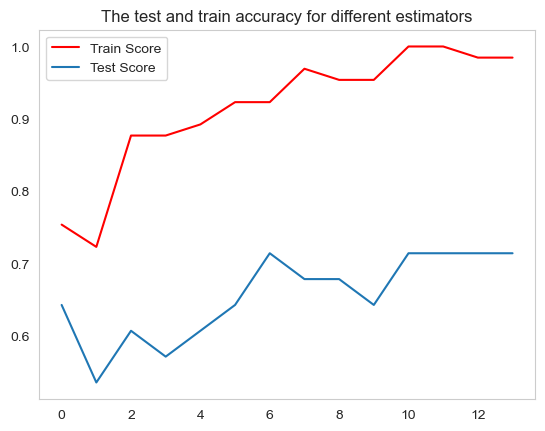

7


In [58]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [59]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [60]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_Word_2_VEC = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_Word_2_VEC = pd.DataFrame(con_mat_rf_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_Word_2_VEC)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_Word_2_VEC = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_Word_2_VEC = pd.DataFrame(report_rf_Word_2_VEC).transpose()
df_Third_Approach_Random_Forest_Pipeline = df_report_rf_Word_2_VEC
display(df_report_rf_Word_2_VEC)

The Confusion Matrix for Random Forest


,Predicted 0,Predicted 1
True 0,2,7
True 1,1,18


The Classification Report for Random Forest


,precision,recall,f1-score,support
-1,0.666667,0.222222,0.333333,9.000000
1,0.720000,0.947368,0.818182,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.693333,0.584795,0.575758,28.000000
weighted avg,0.702857,0.714286,0.662338,28.000000


#### 4.2.3.3 XGBoost

In [61]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Word_2_VEC = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Word_2_VEC.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Word_2_VEC.score(X_test, y_test_mapped)}")

XG Boost train score: 1.0
XG Boost test score: 0.5357142857142857


In [62]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Word_2_VEC = confusion_matrix(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test))
df_cm_xgb_Word_2_VEC = pd.DataFrame(con_mat_xgb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Word_2_VEC)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
display(df_report_xgb_Word_2_VEC)

The Confusion Matrix for XGBoost


,Predicted 0,Predicted 1
True 0,2,7
True 1,6,13


The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.250000,0.222222,0.235294,9.000000
1,0.650000,0.684211,0.666667,19.000000
accuracy,0.535714,0.535714,0.535714,0.535714
macro avg,0.450000,0.453216,0.450980,28.000000
weighted avg,0.521429,0.535714,0.528011,28.000000


In [63]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n

In [64]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Word_2_VEC = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Word_2_VEC.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Word_2_VEC = XGB_model_Word_2_VEC.predict(X_test)

# Training score
train_score = XGB_model_Word_2_VEC.score(X_train, y_train_mapped)
test_score = XGB_model_Word_2_VEC.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Word_2_VEC = confusion_matrix(y_test_mapped, y_pred_XGB_Word_2_VEC)
con_mat_XGB_Word_2_VEC = pd.DataFrame(con_mat_XGB_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Word_2_VEC

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Word_2_VEC = classification_report(y_test_mapped, XGB_model_Word_2_VEC.predict(X_test), output_dict=True)
df_report_xgb_Word_2_VEC = pd.DataFrame(report_xgb_Word_2_VEC).transpose()
df_Third_Approach_xgb_Pipeline = df_report_xgb_Word_2_VEC
display(df_report_xgb_Word_2_VEC)

Score on training set: 1.0
Score on test set: 0.4642857142857143
The Confusion Matrix for XGBoost
The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.125000,0.111111,0.117647,9.000000
1,0.600000,0.631579,0.615385,19.000000
accuracy,0.464286,0.464286,0.464286,0.464286
macro avg,0.362500,0.371345,0.366516,28.000000
weighted avg,0.447321,0.464286,0.455398,28.000000


#### 4.2.3.4 Naive Bayes

In [65]:
# Create and fit the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_nb = naive_bayes.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes.score(X_train, y_train)
test_score_NB = naive_bayes.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.49230769230769234
Score on test set: 0.5


In [66]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Word_2_VEC = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Word_2_VEC = pd.DataFrame(con_mat_nb_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Word_2_VEC)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Word_2_VEC = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Word_2_VEC = pd.DataFrame(report_nb_Word_2_VEC).transpose()
display(df_report_nb_Word_2_VEC)

The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,7,2
True 1,12,7


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
-1,0.368421,0.777778,0.5,9.0
1,0.777778,0.368421,0.5,19.0
accuracy,0.500000,0.500000,0.5,0.5
macro avg,0.573099,0.573099,0.5,28.0
weighted avg,0.646199,0.500000,0.5,28.0


In [67]:
# Create an estimator with the Gaussian Naive Bayes classifier
estimators = [('classifier', GaussianNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {}  

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [68]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_nb_model = fitted_search.best_estimator_
naive_bayes_Gaussian = best_nb_model.named_steps['classifier']
naive_bayes_Gaussian.fit(X_train, y_train)

# Predictions in the test set
y_pred_gaussian_nb = naive_bayes_Gaussian.predict(X_test)

# Training score
train_score_gaussian_nb = naive_bayes_Gaussian.score(X_train, y_train)
test_score_gaussian_nb = naive_bayes_Gaussian.score(X_test, y_test)

print(f"Score on training set: {train_score_gaussian_nb}")
print(f"Score on test set: {test_score_gaussian_nb}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Gaussian Naive Bayes')
con_mat_gaussian_nb = confusion_matrix(y_test, y_pred_gaussian_nb)
df_cm_gaussian_nb = pd.DataFrame(con_mat_gaussian_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_gaussian_nb)

# Creation of the classification report for Gaussian Naive Bayes
print('The Classification Report for Gaussian Naive Bayes')
report_gaussian_nb = classification_report(y_test, y_pred_gaussian_nb, output_dict=True)
df_report_gaussian_nb = pd.DataFrame(report_gaussian_nb).transpose()
df_Third_Approach_NB_Pipeline = df_report_gaussian_nb
display(df_report_gaussian_nb)

Score on training set: 0.49230769230769234
Score on test set: 0.5
The Confusion Matrix for Gaussian Naive Bayes


,Predicted 0,Predicted 1
True 0,7,2
True 1,12,7


The Classification Report for Gaussian Naive Bayes


,precision,recall,f1-score,support
-1,0.368421,0.777778,0.5,9.0
1,0.777778,0.368421,0.5,19.0
accuracy,0.500000,0.500000,0.5,0.5
macro avg,0.573099,0.573099,0.5,28.0
weighted avg,0.646199,0.500000,0.5,28.0


#### 4.2.3.5 Support Vector Machine

In [69]:
# Create and fit the SVM model
svm_model_Word_2_VEC = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Word_2_VEC = svm_model_Word_2_VEC.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286


In [70]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Word_2_VEC = pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
display(df_report_svm_Word_2_VEC)

The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,1,8
True 1,0,19


The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [71]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [72]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Word_2_VEC = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Word_2_VEC.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Word_2_VEC.predict(X_test)

# Training score
train_score_svm = svm_model_Word_2_VEC.score(X_train, y_train)
test_score_svm = svm_model_Word_2_VEC.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Word_2_VEC = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Word_2_VEC= pd.DataFrame(con_mat_svm_Word_2_VEC, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Word_2_VEC)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Word_2_VEC = classification_report(y_test, y_pred_svm_Word_2_VEC, output_dict=True)
df_report_svm_Word_2_VEC = pd.DataFrame(report_svm_Word_2_VEC).transpose()
df_Third_Approach_SVM_Pipeline = df_report_svm_Word_2_VEC
display(df_report_svm_Word_2_VEC)

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286
The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


### 4.2.4 Spacy 

In [73]:
nlp = spacy.load('en_core_web_sm')

# Process your text data and store the vectors in a list
text_vectors = []
for text in df.text:
    doc = nlp(text)
    text_vector = doc.vector  # Get the vector representation for the document
    text_vectors.append(text_vector)

# Create a DataFrame from the text vectors
X_df = pd.DataFrame(text_vectors)
# Define the vector of targets and matrix of features
y = df.sentiment
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

y.value_counts()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65, 96), (28, 96), (65,), (28,))

#### 4.2.4.1 Logistic Regression

In [74]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Spacy = logreg.score(X_train, y_train)
test_score_Spacy = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Spacy}")
print(f"Score on test set: {test_score_Spacy}")

Score on training set: 0.7384615384615385
Score on test set: 0.6785714285714286


In [75]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Spacy)
print('The Classification report for Logistic Regression')
report_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Spacy = pd.DataFrame(report_Spacy).transpose()
df_report_Spacy

The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,1,8
True 1,1,18


The Classification report for Logistic Regression


,precision,recall,f1-score,support
-1,0.500000,0.111111,0.181818,9.000000
1,0.692308,0.947368,0.800000,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.596154,0.529240,0.490909,28.000000
weighted avg,0.630495,0.678571,0.601299,28.000000


In [76]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier', LogisticRegression(C=0.0001, random_state=1))])

In [77]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Spacy = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Spacy = pd.DataFrame(con_mat_lr_final_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Spacy)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Spacy = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Spacy = pd.DataFrame(report_lr_final_Spacy).transpose()
df_Fourth_Aproach_Logistic_Regression_Pipline = df_report_lr_final_Spacy
display(df_report_lr_final_Spacy)

Score on training set: 0.9538461538461539
Score on test set: 0.75
The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,5,4
True 1,3,16


The Classification Report  for Logistic Regression


,precision,recall,f1-score,support
-1,0.62500,0.555556,0.588235,9.00
1,0.80000,0.842105,0.820513,19.00
accuracy,0.75000,0.750000,0.750000,0.75
macro avg,0.71250,0.698830,0.704374,28.00
weighted avg,0.74375,0.750000,0.745852,28.00


#### 4.2.4.2 Random Forest

In [78]:
my_random_forest_Spacy = RandomForestClassifier(random_state=1)
my_random_forest_Spacy.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Spacy.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Spacy.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7142857142857143


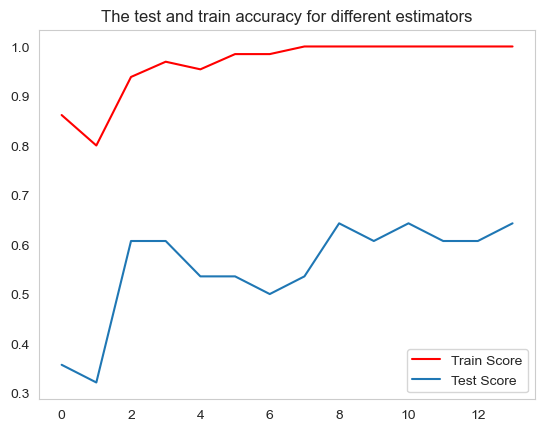

9


In [79]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [80]:
# Predicting the test set results
y_pred_rand = my_random_forest_Spacy.predict(X_test)

In [81]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_lr_Spacy = confusion_matrix(y_test, y_pred_rand)
df_cm_lr_Spacy = pd.DataFrame(con_mat_lr_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_Spacy)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_lr_Spacy = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_lr_Spacy = pd.DataFrame(report_lr_Spacy).transpose()
df_Fourth_Aproach_RF_Pipline = df_report_lr_Spacy
display(df_report_lr_Spacy)

The Confusion Matrix for Random Forest


,Predicted 0,Predicted 1
True 0,2,7
True 1,1,18


The Classification Report for Random Forest


,precision,recall,f1-score,support
-1,0.666667,0.222222,0.333333,9.000000
1,0.720000,0.947368,0.818182,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.693333,0.584795,0.575758,28.000000
weighted avg,0.702857,0.714286,0.662338,28.000000


#### 4.2.4.3 XGBoost

In [82]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Spacy = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Spacy.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Spacy.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Spacy.score(X_test, y_test_mapped)}")

XG Boost train score: 1.0
XG Boost test score: 0.7142857142857143


In [83]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Spacy = confusion_matrix(y_test_mapped, XGB_model_Spacy.predict(X_test))
df_cm_xgb_Spacy = pd.DataFrame(con_mat_xgb_CV, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Spacy)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
display(df_report_xgb_Spacy)

The Confusion Matrix for XGBoost


,Predicted 0,Predicted 1
True 0,5,4
True 1,2,17


The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.571429,0.444444,0.500000,9.000000
1,0.761905,0.842105,0.800000,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.666667,0.643275,0.650000,28.000000
weighted avg,0.700680,0.714286,0.703571,28.000000


In [84]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_

In [85]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Spacy = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Spacy.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Spacy = XGB_model_Spacy.predict(X_test)

# Training score
train_score = XGB_model_Spacy.score(X_train, y_train_mapped)
test_score = XGB_model_Spacy.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Spacy = confusion_matrix(y_test_mapped, y_pred_XGB_Spacy)
con_mat_XGB_Spacy = pd.DataFrame(con_mat_XGB_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Spacy

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Spacy = classification_report(y_test_mapped, XGB_model_Spacy.predict(X_test), output_dict=True)
df_report_xgb_Spacy = pd.DataFrame(report_xgb_Spacy).transpose()
df_Fourth_Aproach_xgb_Pipline = df_report_xgb_Spacy
display(df_report_xgb_Spacy)

Score on training set: 1.0
Score on test set: 0.6785714285714286
The Confusion Matrix for XGBoost
The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.500000,0.333333,0.400000,9.000000
1,0.727273,0.842105,0.780488,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.613636,0.587719,0.590244,28.000000
weighted avg,0.654221,0.678571,0.658188,28.000000


#### 4.2.4.4 Naive Bayes

In [86]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Spacy = MultinomialNB()
naive_bayes_Spacy.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Spacy.score(X_train, y_train)
test_score_NB = naive_bayes_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286


In [87]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Spacy = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Spacy = pd.DataFrame(con_mat_nb_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Spacy)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Spacy = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Spacy = pd.DataFrame(report_nb_Spacy).transpose()
display(df_report_nb_Spacy)

The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for Naive Bayes


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


In [88]:
# Create a pipeline with scaling for grid search
estimators = [('scaler', MinMaxScaler()), ('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Preprocess data to remove negative values
X_train_non_negative = np.where(X_train < 0, 0, X_train)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data (scaled)
fitted_search = grid_search.fit(X_train_non_negative, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

# Apply Min-Max Scaling to test data before prediction
X_test_non_negative = np.where(X_test < 0, 0, X_test)
X_test_scaled = fitted_search.best_estimator_['scaler'].transform(X_test_non_negative)

# Predicting the results of the test set
y_pred_nb = best_nb_model['classifier'].predict(X_test_scaled)

# Calculate the training and test scores
train_score_NB = best_nb_model.score(X_train_non_negative, y_train)
test_score_NB = best_nb_model.score(X_test_scaled, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8769230769230769
Score on test set: 0.7857142857142857


In [89]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']

# Preprocess data to remove negative values
X_train_non_negative = np.where(X_train < 0, 0, X_train)

naive_bayes = MultinomialNB(alpha=best_alpha)
naive_bayes.fit(X_train_non_negative, y_train)

# Apply the same preprocessing to the test data
X_test_non_negative = np.where(X_test < 0, 0, X_test)

# Predictions in the test set
y_pred_nb = naive_bayes.predict(X_test_non_negative)

# Training score
train_score_NB = naive_bayes.score(X_train_non_negative, y_train)
test_score_NB = naive_bayes.score(X_test_non_negative, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb = confusion_matrix(y_test, y_pred_nb)
df_cm_nb = pd.DataFrame(con_mat_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Spacy = pd.DataFrame(report_nb).transpose()
df_Fourth_Aproach_NB_Pipline = df_report_nb_Spacy
display(df_report_nb_Spacy)

Score on training set: 0.7076923076923077
Score on test set: 0.6428571428571429
The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,0,9
True 1,1,18


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.666667,0.947368,0.782609,19.000000
accuracy,0.642857,0.642857,0.642857,0.642857
macro avg,0.333333,0.473684,0.391304,28.000000
weighted avg,0.452381,0.642857,0.531056,28.000000


#### 4.2.4.5 Support Vector Machine

In [90]:
# Create and fit the SVM model
svm_model_Spacy = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Spacy.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm = svm_model_Spacy.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 0.8615384615384616
Score on test set: 0.75


In [91]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Spacy)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
display(df_report_svm_Spacy)

The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,4,5
True 1,2,17


The Classification Report for SVM


,precision,recall,f1-score,support
-1,0.666667,0.444444,0.533333,9.00
1,0.772727,0.894737,0.829268,19.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.719697,0.669591,0.681301,28.00
weighted avg,0.738636,0.750000,0.734146,28.00


In [92]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [93]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Spacy = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Spacy.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Spacy.predict(X_test)

# Training score
train_score_svm = svm_model_Spacy.score(X_train, y_train)
test_score_svm = svm_model_Spacy.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Spacy = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Spacy = pd.DataFrame(con_mat_svm_Spacy, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Spacy)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Spacy = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Spacy = pd.DataFrame(report_svm_Spacy).transpose()
df_Fourth_Aproach_SVM_Pipline = df_report_svm_Spacy
display(df_report_svm_Spacy)

Score on training set: 0.6923076923076923
Score on test set: 0.6785714285714286
The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for SVM


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
-1,0.000000,0.000000,0.000000,9.000000
1,0.678571,1.000000,0.808511,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.339286,0.500000,0.404255,28.000000
weighted avg,0.460459,0.678571,0.548632,28.000000


### 4.2.5 Custom 

In [94]:
# Vectorization
vectorizer = CountVectorizer(
    tokenizer=lambda text: text.split(), # Custom tokenizer (split by spaces)
    stop_words='english', # Remove common English words (optional)
    max_features=100 # Limit the vocabulary to the 100 most frequent words (optional)
)

# Fit the vectorizer to the text data
vectorizer.fit(df['text'])

# Transform the text data into a matrix of features
X = vectorizer.transform(df['text'])

# Create a DataFrame with the characteristics
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

# Check the number of occurrences of each sentiment class
y.value_counts()

# Check the dimensions of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

c:\Users\pport\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((65, 100), (28, 100), (65,), (28,))

#### 4.2.5.1 Logistic Regression

In [95]:
# Create and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=1)
logreg.fit(X_train, y_train)  # Usando X_train e y_train do seu código anterior

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)  # Usando X_test do seu código anterior

# Training score
train_score_Custom = logreg.score(X_train, y_train)
test_score_Custom = logreg.score(X_test, y_test)

print(f"Score on training set: {train_score_Custom}")
print(f"Score on test set: {test_score_Custom}")

Score on training set: 0.9846153846153847
Score on test set: 0.7142857142857143


In [96]:
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_Custom = pd.DataFrame(con_mat_lr_Custom, columns = ['Predicted 0','Predicted 1'], index = ['True 0','True 1'])
display(df_cm_lr_Custom)
print('The Classification report for Logistic Regression')
report_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_Custom = pd.DataFrame(report_Custom).transpose()
df_report_Custom

The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,4,5
True 1,3,16


The Classification report for Logistic Regression


,precision,recall,f1-score,support
-1,0.571429,0.444444,0.500000,9.000000
1,0.761905,0.842105,0.800000,19.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.666667,0.643275,0.650000,28.000000
weighted avg,0.700680,0.714286,0.703571,28.000000


In [97]:
estimators = [('classifier',LogisticRegression(solver='lbfgs',multi_class='auto',random_state=1))]
pipe = Pipeline(estimators)

params = {'classifier__C' : [10**j for j in range(-4,4)]}
grid_search = GridSearchCV(pipe, param_grid=params,cv=5)

fitted_search = grid_search.fit(X_train, y_train)

fitted_search.best_estimator_

Pipeline(steps=[('classifier', LogisticRegression(C=1, random_state=1))])

In [98]:
logreg = LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=1,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Training score
print(f"Score on training set: {logreg.score(X_train,y_train)}")
print(f"Score on test set: {logreg.score(X_test,y_test)}")

# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Logistic Regression')
con_mat_lr_final_Custom = confusion_matrix(y_test, y_pred_logreg)
df_cm_lr_final_Custom = pd.DataFrame(con_mat_lr_final_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_lr_final_Custom)

# Creation of the ranking report
print('The Classification Report  for Logistic Regression')
report_lr_final_Custom = classification_report(y_test, y_pred_logreg, output_dict=True)
df_report_lr_final_Custom = pd.DataFrame(report_lr_final_Custom).transpose()
df_Fifth_Aproach_LR_Pipeline = df_report_lr_final_Custom
display(df_report_lr_final_Custom)

Score on training set: 1.0
Score on test set: 0.6785714285714286
The Confusion Matrix for Logistic Regression


,Predicted 0,Predicted 1
True 0,5,4
True 1,5,14


The Classification Report  for Logistic Regression


,precision,recall,f1-score,support
-1,0.500000,0.555556,0.526316,9.000000
1,0.777778,0.736842,0.756757,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.638889,0.646199,0.641536,28.000000
weighted avg,0.688492,0.678571,0.682686,28.000000


####  4.2.5.2  Random Forest

In [99]:
my_random_forest_Custom = RandomForestClassifier(random_state=1)
my_random_forest_Custom.fit(X_train,y_train)
print(f"Random Forest: {my_random_forest_Custom.score(X_train,y_train)}")
print(f"Random Forest: {my_random_forest_Custom.score(X_test, y_test)}")

Random Forest: 1.0
Random Forest: 0.7857142857142857


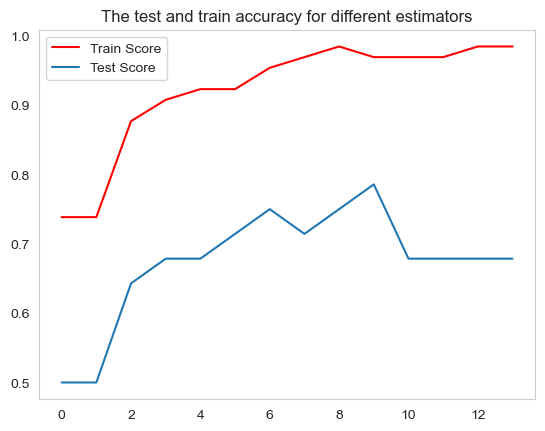

10


In [100]:
dt_train = []
dt_test = []
depth = []

for i in range(1, 15):
    my_random_forest = RandomForestClassifier(n_estimators=i, random_state=1)
    my_random_forest.fit(X_train, y_train)
    dt_train.append(my_random_forest.score(X_train, y_train))
    dt_test.append(my_random_forest.score(X_test, y_test))
    depth.append(i)

# Setting the seaborn style to set the background to white
sns.set_style("whitegrid")

plt.figure()
plt.title('The test and train accuracy for different estimators')

# Create the line graph for the training and test
plt.plot(dt_train, color='red', label='Train Score')
plt.plot(dt_test, label='Test Score')

# Remove the grids
plt.grid(False)

plt.legend()
plt.show()

print(depth[np.argmax(dt_test)])

##### 4.2.1.2.1 Now we found the optimal n_estimators as 11, the both train and test accuracy are increased.

In [101]:
# Predicting the test set results
y_pred_rand = my_random_forest.predict(X_test)

In [102]:
# Creating the confusion matrix / DataFrame
print('The Confusion Matrix for Random Forest')
con_mat_rf_Custom = confusion_matrix(y_test, y_pred_rand)
df_cm_rf_Custom = pd.DataFrame(con_mat_rf_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_rf_Custom)

# Creation of the ranking report
print('The Classification Report for Random Forest')
report_rf_Custom = classification_report(y_test, y_pred_rand, output_dict=True)
df_report_rf_Custom = pd.DataFrame(report_rf_Custom).transpose()
df_Fifth_Aproach_RF_Pipeline = df_report_rf_Custom
display(df_report_rf_Custom)

The Confusion Matrix for Random Forest


,Predicted 0,Predicted 1
True 0,3,6
True 1,3,16


The Classification Report for Random Forest


,precision,recall,f1-score,support
-1,0.500000,0.333333,0.400000,9.000000
1,0.727273,0.842105,0.780488,19.000000
accuracy,0.678571,0.678571,0.678571,0.678571
macro avg,0.613636,0.587719,0.590244,28.000000
weighted avg,0.654221,0.678571,0.658188,28.000000


####  4.2.5.3  XGBoost

In [103]:
y_train_mapped = y_train.map({-1: 0, 1: 1})
y_test_mapped = y_test.map({-1: 0, 1: 1})
XGB_model_Custom = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees (or estimators) in the model
    learning_rate=0.1, # Learning rate
    max_depth=3, # Maximum tree depth
    random_state=42  # Seed for reproducibility
)
XGB_model_Custom.fit(X_train, y_train_mapped)

print(f"XG Boost train score: {XGB_model_Custom.score(X_train, y_train_mapped)}")
print(f"XG Boost test score: {XGB_model_Custom.score(X_test, y_test_mapped)}")

XG Boost train score: 0.9538461538461539
XG Boost test score: 0.6428571428571429


In [104]:
# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_xgb_Custom = confusion_matrix(y_test_mapped, XGB_model_Custom.predict(X_test))
df_cm_xgb_Custom = pd.DataFrame(con_mat_xgb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_xgb_Custom)

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
display(df_report_xgb_Custom)

The Confusion Matrix for XGBoost


,Predicted 0,Predicted 1
True 0,3,6
True 1,4,15


The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.428571,0.333333,0.375000,9.000000
1,0.714286,0.789474,0.750000,19.000000
accuracy,0.642857,0.642857,0.642857,0.642857
macro avg,0.571429,0.561404,0.562500,28.000000
weighted avg,0.622449,0.642857,0.629464,28.000000


In [105]:
# Define the pipeline with an XGBoost classifier
estimators = [('classifier', xgb.XGBClassifier(random_state=1))]
pipe = Pipeline(estimators)

# Define the parameter grid for grid search
params = {
    'classifier__n_estimators': [100, 300, 500],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search to the training data
fitted_search = grid_search.fit(X_train, y_train_mapped)

# Get the best estimator with optimal hyperparameters
best_estimator = fitted_search.best_estimator_

# Print the best estimator
print("Best Estimator:", best_estimator)


Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=300, 

In [106]:
# Create the XGBoost model with the specified hyperparameters
XGB_model_Custom = xgb.XGBClassifier(random_state=1)

# Fit the model to the training data
XGB_model_Custom.fit(X_train, y_train_mapped)

# Predicting the test set results
y_pred_XGB_Custom = XGB_model_Custom.predict(X_test)

# Training score
train_score = XGB_model_Custom.score(X_train, y_train_mapped)
test_score = XGB_model_Custom.score(X_test, y_test_mapped)

print(f"Score on training set: {train_score}")
print(f"Score on test set: {test_score}")

# Generate and display the confusion matrix
print('The Confusion Matrix for XGBoost')
con_mat_XGB_Custom = confusion_matrix(y_test_mapped, y_pred_XGB_Custom)
con_mat_XGB_Custom = pd.DataFrame(con_mat_XGB_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
con_mat_XGB_Custom

# Generate and display the classification report
print('The Classification report for XGBoost')
report_xgb_Custom = classification_report(y_test_mapped, XGB_model_Custom.predict(X_test), output_dict=True)
df_report_xgb_Custom = pd.DataFrame(report_xgb_Custom).transpose()
df_Fifth_Aproach_xgb_Pipeline = df_report_xgb_Custom
display(df_report_xgb_Custom)

Score on training set: 0.9846153846153847
Score on test set: 0.6428571428571429
The Confusion Matrix for XGBoost
The Classification report for XGBoost


,precision,recall,f1-score,support
0,0.444444,0.444444,0.444444,9.000000
1,0.736842,0.736842,0.736842,19.000000
accuracy,0.642857,0.642857,0.642857,0.642857
macro avg,0.590643,0.590643,0.590643,28.000000
weighted avg,0.642857,0.642857,0.642857,28.000000


In [107]:
# Replace -1 with 0 in the sentiment column
df['sentiment'] = df['sentiment'].replace(-1, 0)

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

####  4.2.5.4  Naive Bayes

In [108]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Multinomial Naive Bayes model on the scaled data
# Create and fit the Naive Bayes model
naive_bayes_Custom = MultinomialNB()
naive_bayes_Custom.fit(X_train_scaled, y_train)

# Predicting the results of the test set
y_pred_nb = naive_bayes_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

Score on training set: 0.8615384615384616
Score on test set: 0.7857142857142857


c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
c:\Users\pport\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [109]:
# Creation of the confusion matrix / DataFrame for the Naive Bayes model
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for the Naive Bayes model
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
display(df_report_nb_Custom)

The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,5,4
True 1,2,17


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
0,0.714286,0.555556,0.625000,9.000000
1,0.809524,0.894737,0.850000,19.000000
accuracy,0.785714,0.785714,0.785714,0.785714
macro avg,0.761905,0.725146,0.737500,28.000000
weighted avg,0.778912,0.785714,0.777679,28.000000


In [110]:
# Create an estimator with the Naive Bayes classifier
estimators = [('classifier', MultinomialNB())]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_nb_model = fitted_search.best_estimator_

In [111]:
# Create and fit the Naive Bayes model (using the best parameters from the grid search)
best_alpha = fitted_search.best_params_['classifier__alpha']
naive_bayes_Custom = MultinomialNB(alpha=best_alpha)
naive_bayes_Custom.fit(X_train, y_train)

# Predictions in the test set
y_pred_nb = naive_bayes_Custom.predict(X_test)

# Training score
train_score_NB = naive_bayes_Custom.score(X_train, y_train)
test_score_NB = naive_bayes_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_NB}")
print(f"Score on test set: {test_score_NB}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for Naive Bayes')
con_mat_nb_Custom = confusion_matrix(y_test, y_pred_nb)
df_cm_nb_Custom = pd.DataFrame(con_mat_nb_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_nb_Custom)

# Creation of the classification report for Naive Bayes
print('The Classification Report for Naive Bayes')
report_nb_Custom = classification_report(y_test, y_pred_nb, output_dict=True)
df_report_nb_Custom = pd.DataFrame(report_nb_Custom).transpose()
df_Fifth_Aproach_NB_Pipeline = df_report_nb_Custom
display(df_report_nb_Custom)

Score on training set: 0.8769230769230769
Score on test set: 0.7857142857142857
The Confusion Matrix for Naive Bayes


,Predicted 0,Predicted 1
True 0,4,5
True 1,1,18


The Classification Report for Naive Bayes


,precision,recall,f1-score,support
0,0.800000,0.444444,0.571429,9.000000
1,0.782609,0.947368,0.857143,19.000000
accuracy,0.785714,0.785714,0.785714,0.785714
macro avg,0.791304,0.695906,0.714286,28.000000
weighted avg,0.788199,0.785714,0.765306,28.000000


####  4.2.5.5 Support Vector Machine

In [112]:
# Replace back 0 with -1 in the sentiment column
df['sentiment'] = df['sentiment'].replace(0, -1)

# Define the vector of targets (sentiment)
y = df['sentiment']

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.3, random_state=42, stratify=y)

In [113]:
# Create and fit the SVM model
svm_model_Custom = SVC(kernel='linear', C=1.0, random_state=1)
svm_model_Custom.fit(X_train, y_train) # Using X_train and y_train from your previous code

# Predicting the results of the test set
y_pred_svm_Custom = svm_model_Custom.predict(X_test) # Using X_test from your previous code

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

Score on training set: 1.0
Score on test set: 0.5714285714285714


In [114]:
# Creation of the confusion matrix / DataFrame for the SVM model
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for the SVM model
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm_Custom, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
display(df_report_svm_Custom)

The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,0,9
True 1,0,19


The Classification Report for SVM


,precision,recall,f1-score,support
-1,0.363636,0.444444,0.400000,9.000000
1,0.705882,0.631579,0.666667,19.000000
accuracy,0.571429,0.571429,0.571429,0.571429
macro avg,0.534759,0.538012,0.533333,28.000000
weighted avg,0.595875,0.571429,0.580952,28.000000


In [115]:
# Create an estimator with the SVM classifier
estimators = [('classifier', SVC(kernel='linear', random_state=1))]
pipe = Pipeline(estimators)

# Define the parameters for grid search
params = {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid=params, cv=5)

# Fit the grid search model to the training data
fitted_search = grid_search.fit(X_train, y_train)

# Find the best estimator (model)
best_svm_model = fitted_search.best_estimator_

In [116]:
# Create and fit the SVM model with the best parameters found
best_C = fitted_search.best_params_['classifier__C']
best_kernel = fitted_search.best_params_['classifier__kernel']
svm_model_Custom = SVC(C=best_C, kernel=best_kernel, random_state=1)
svm_model_Custom.fit(X_train, y_train)

# Predictions on the test set
y_pred_svm = svm_model_Custom.predict(X_test)

# Training score
train_score_svm = svm_model_Custom.score(X_train, y_train)
test_score_svm = svm_model_Custom.score(X_test, y_test)

print(f"Score on training set: {train_score_svm}")
print(f"Score on test set: {test_score_svm}")

# Creation of the confusion matrix / DataFrame
print('The Confusion Matrix for SVM')
con_mat_svm_Custom = confusion_matrix(y_test, y_pred_svm)
df_cm_svm_Custom = pd.DataFrame(con_mat_svm_Custom, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
display(df_cm_svm_Custom)

# Creation of the classification report for SVM
print('The Classification Report for SVM')
report_svm_Custom = classification_report(y_test, y_pred_svm, output_dict=True)
df_report_svm_Custom = pd.DataFrame(report_svm_Custom).transpose()
df_Fifth_Aproach_SVM_Pipeline = df_report_svm_Custom
display(df_report_svm_Custom)

Score on training set: 0.9076923076923077
Score on test set: 0.6428571428571429
The Confusion Matrix for SVM


,Predicted 0,Predicted 1
True 0,2,7
True 1,3,16


The Classification Report for SVM


,precision,recall,f1-score,support
-1,0.400000,0.222222,0.285714,9.000000
1,0.695652,0.842105,0.761905,19.000000
accuracy,0.642857,0.642857,0.642857,0.642857
macro avg,0.547826,0.532164,0.523810,28.000000
weighted avg,0.600621,0.642857,0.608844,28.000000


# Results table

In [118]:
data = [
    ["", "", "", "", ""],
    ["", "Precision", "Recall", "F1-Score", "Support"],
    ["Logistic Regression (CountVectorizer)", df_First_Approach_Logistics_Regression_Pipeline['precision'][1], df_First_Approach_Logistics_Regression_Pipeline['recall'][1],
     df_First_Approach_Logistics_Regression_Pipeline['f1-score'][1],df_First_Approach_Logistics_Regression_Pipeline['support'][1] ],
     ["Random Forest (CountVectorizer)", df_First_Approach_Random_Forest_Pipeline['precision'][1], df_First_Approach_Random_Forest_Pipeline['recall'][1],
     df_First_Approach_Random_Forest_Pipeline['f1-score'][1],df_First_Approach_Random_Forest_Pipeline['support'][1] ],
     ["XGBoost (CountVectorizer)", df_First_Approach_XGBoost_Pipeline['precision'][1], df_First_Approach_XGBoost_Pipeline['recall'][1],
     df_First_Approach_XGBoost_Pipeline['f1-score'][1],df_First_Approach_XGBoost_Pipeline['support'][1] ],
     ["Naive Bayes (CountVectorizer)", df_First_Approach_Naive_Bayes_Pipeline['precision'][1], df_First_Approach_Naive_Bayes_Pipeline['recall'][1],
     df_First_Approach_Naive_Bayes_Pipeline['f1-score'][1],df_First_Approach_Naive_Bayes_Pipeline['support'][1] ],
     ["SVM (CountVectorizer)", df_First_Approach_SVM_Pipeline['precision'][1], df_First_Approach_SVM_Pipeline['recall'][1],
     df_First_Approach_SVM_Pipeline['f1-score'][1],df_First_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Tf-IDF)", df_Second_Approach_Logistic_Regression_Pipeline['precision'][1], df_Second_Approach_Logistic_Regression_Pipeline['recall'][1],
     df_Second_Approach_Logistic_Regression_Pipeline['f1-score'][1],df_Second_Approach_Logistic_Regression_Pipeline['support'][1] ],
     ["Random Forest (Tf-IDF)", df_Second_Approach_Random_Forest_Pipeline['precision'][1], df_Second_Approach_Random_Forest_Pipeline['recall'][1],
     df_Second_Approach_Random_Forest_Pipeline['f1-score'][1],df_Second_Approach_xgb_Pipeline['support'][1] ],
     ["XGBoost (Tf-IDF)", df_Second_Approach_xgb_Pipeline['precision'][1], df_First_Approach_XGBoost_Pipeline['recall'][1],
     df_Second_Approach_xgb_Pipeline['f1-score'][1],df_Second_Approach_xgb_Pipeline['support'][1] ],
     ["Naive Bayes (Tf-IDF)", df_Second_Approach_NB_Pipeline['precision'][1], df_Second_Approach_NB_Pipeline['recall'][1],
     df_Second_Approach_NB_Pipeline['f1-score'][1],df_Second_Approach_NB_Pipeline['support'][1] ],
     ["SVM (Tf-IDF)", df_Second_Approach_SVM_Pipeline['precision'][1], df_Second_Approach_SVM_Pipeline['recall'][1],
     df_Second_Approach_SVM_Pipeline['f1-score'][1],df_Second_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Word2Vec)", df_Third_Approach_Logistic_Regression_Pipeline['precision'][1], df_Third_Approach_Logistic_Regression_Pipeline['recall'][1],
     df_Third_Approach_Logistic_Regression_Pipeline['f1-score'][1],df_Third_Approach_Logistic_Regression_Pipeline['support'][1] ],
     ["Random Forest (Word2Vec)", df_Third_Approach_Random_Forest_Pipeline['precision'][1], df_Third_Approach_Random_Forest_Pipeline['recall'][1],
     df_Third_Approach_Random_Forest_Pipeline['f1-score'][1],df_Third_Approach_Random_Forest_Pipeline['support'][1] ],
     ["XGBoost (Word2Vec)", df_Third_Approach_xgb_Pipeline['precision'][1], df_Third_Approach_xgb_Pipeline['recall'][1],
     df_Third_Approach_xgb_Pipeline['f1-score'][1],df_Third_Approach_xgb_Pipeline['support'][1] ],
     ["Naive Bayes (Word2Vec)", df_Third_Approach_NB_Pipeline['precision'][1], df_Third_Approach_NB_Pipeline['recall'][1],
     df_Third_Approach_NB_Pipeline['f1-score'][1],df_Third_Approach_NB_Pipeline['support'][1] ],
     ["SVM (Word2Vec)", df_Third_Approach_SVM_Pipeline['precision'][1], df_Third_Approach_SVM_Pipeline['recall'][1],
     df_Third_Approach_SVM_Pipeline['f1-score'][1],df_Third_Approach_SVM_Pipeline['support'][1] ],

     ["Logistic Regression (Spacy)", df_Fourth_Aproach_Logistic_Regression_Pipline['precision'][1], df_Fourth_Aproach_Logistic_Regression_Pipline['recall'][1],
     df_Fourth_Aproach_Logistic_Regression_Pipline['f1-score'][1],df_Fourth_Aproach_Logistic_Regression_Pipline['support'][1] ],
     ["Random Forest (Spacy)", df_Fourth_Aproach_RF_Pipline['precision'][1], df_Fourth_Aproach_RF_Pipline['recall'][1],
     df_Fourth_Aproach_RF_Pipline['f1-score'][1],df_Fourth_Aproach_RF_Pipline['support'][1] ],
     ["XGBoost (Spacy)", df_Fourth_Aproach_xgb_Pipline['precision'][1], df_Fourth_Aproach_xgb_Pipline['recall'][1],
     df_Fourth_Aproach_xgb_Pipline['f1-score'][1],df_Fourth_Aproach_xgb_Pipline['support'][1] ],
     ["Naive Bayes (Spacy)", df_Fourth_Aproach_NB_Pipline['precision'][1], df_Fourth_Aproach_NB_Pipline['recall'][1],
     df_Fourth_Aproach_NB_Pipline['f1-score'][1],df_Fourth_Aproach_NB_Pipline['support'][1] ],
     ["SVM (Spacy)", df_Fourth_Aproach_SVM_Pipline['precision'][1], df_Fourth_Aproach_SVM_Pipline['recall'][1],
     df_Fourth_Aproach_SVM_Pipline['f1-score'][1],df_Fourth_Aproach_SVM_Pipline['support'][1] ],

     ["Logistic Regression (Custom)", df_Fifth_Aproach_LR_Pipeline['precision'][1], df_Fifth_Aproach_LR_Pipeline['recall'][1],
     df_Fifth_Aproach_LR_Pipeline['f1-score'][1],df_Fifth_Aproach_LR_Pipeline['support'][1] ],
     ["Random Forest (Custom)", df_Fifth_Aproach_RF_Pipeline['precision'][1], df_Fifth_Aproach_RF_Pipeline['recall'][1],
     df_Fifth_Aproach_RF_Pipeline['f1-score'][1],df_Fifth_Aproach_RF_Pipeline['support'][1] ],
     ["XGBoost (Custom)", df_Fifth_Aproach_xgb_Pipeline['precision'][1], df_Fifth_Aproach_xgb_Pipeline['recall'][1],
     df_Fifth_Aproach_xgb_Pipeline['f1-score'][1],df_Fifth_Aproach_xgb_Pipeline['support'][1] ],
     ["Naive Bayes (Custom)", df_Fifth_Aproach_NB_Pipeline['precision'][1], df_Fifth_Aproach_NB_Pipeline['recall'][1],
     df_Fifth_Aproach_NB_Pipeline['f1-score'][1],df_Fifth_Aproach_NB_Pipeline['support'][1] ],
     ["SVM (Custom)", df_Fifth_Aproach_SVM_Pipeline['precision'][1], df_Fifth_Aproach_SVM_Pipeline['recall'][1],
     df_Fifth_Aproach_SVM_Pipeline['f1-score'][1],df_Fifth_Aproach_SVM_Pipeline['support'][1] ],
    
]

# Organize data by model
data_reordered = utils.group_rows_by_model(data)
# Print the rearranged table
table = tabulate(data_reordered, headers="firstrow", tablefmt="fancy_grid")
print(table)

╒═══════════════════════════════════════╤════════════════════╤════════════════════╤════════════════════╤═════════╕
│                                       │                    │                    │                    │         │
╞═══════════════════════════════════════╪════════════════════╪════════════════════╪════════════════════╪═════════╡
│                                       │ Precision          │ Recall             │ F1-Score           │ Support │
├───────────────────────────────────────┼────────────────────┼────────────────────┼────────────────────┼─────────┤
│ Logistic Regression (CountVectorizer) │ 0.8260869565217391 │ 1.0                │ 0.9047619047619047 │ 19.0    │
├───────────────────────────────────────┼────────────────────┼────────────────────┼────────────────────┼─────────┤
│ Logistic Regression (Tf-IDF)          │ 0.6785714285714286 │ 1.0                │ 0.8085106382978724 │ 19.0    │
├───────────────────────────────────────┼────────────────────┼──────────────────

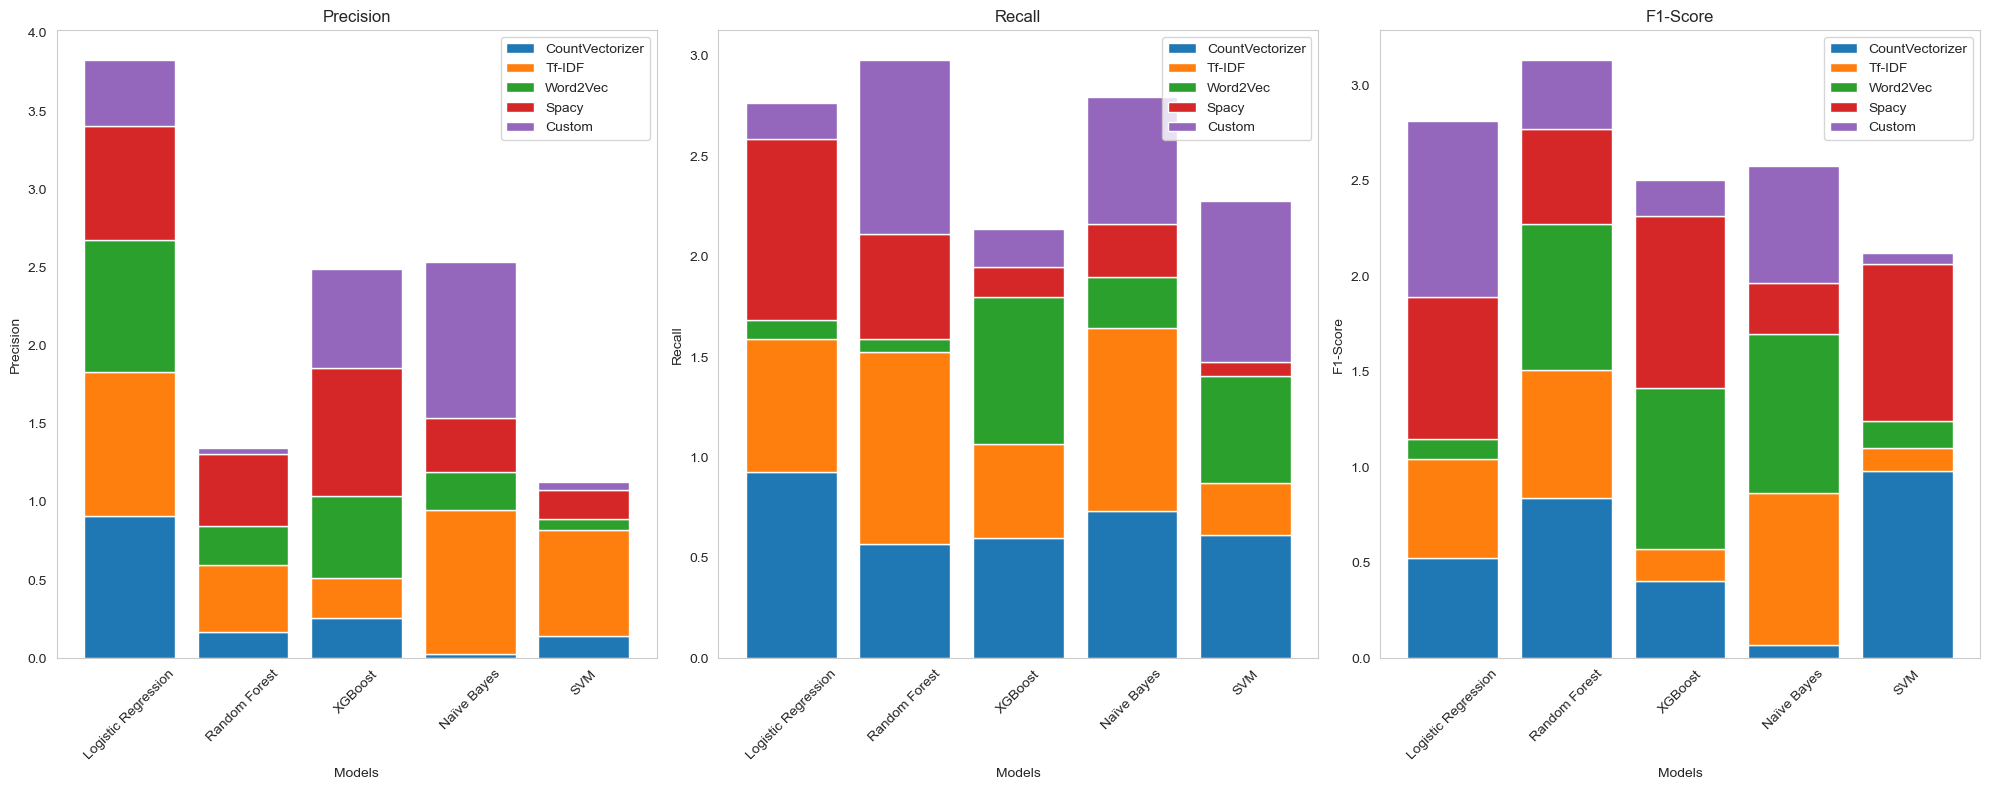

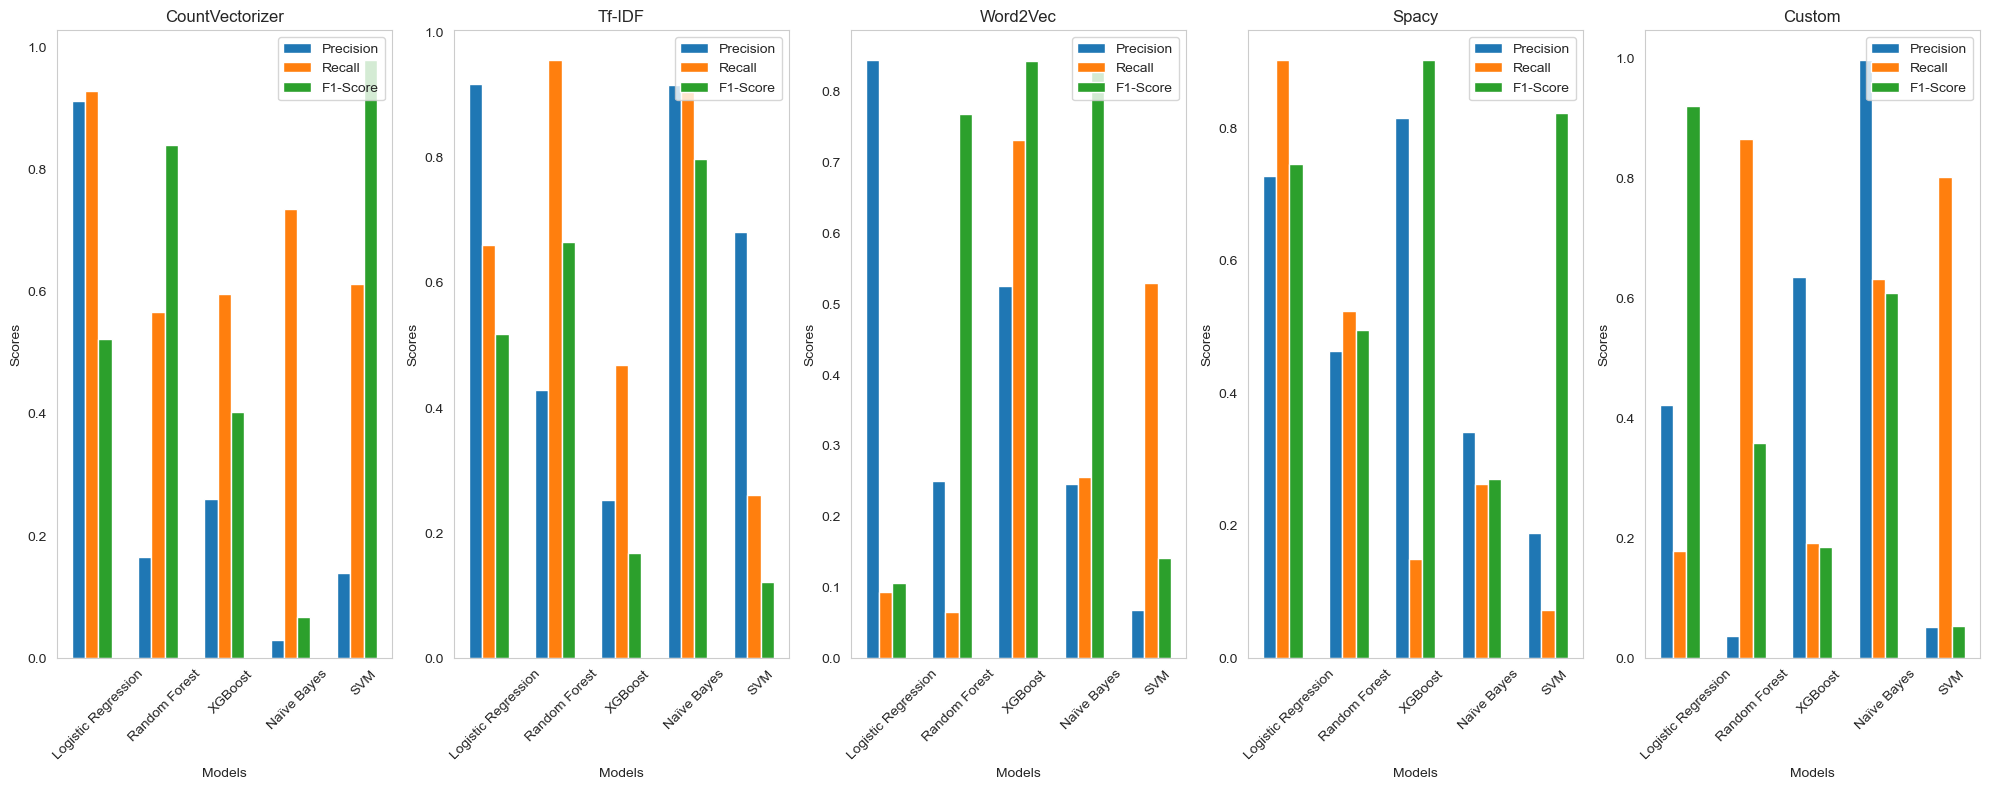

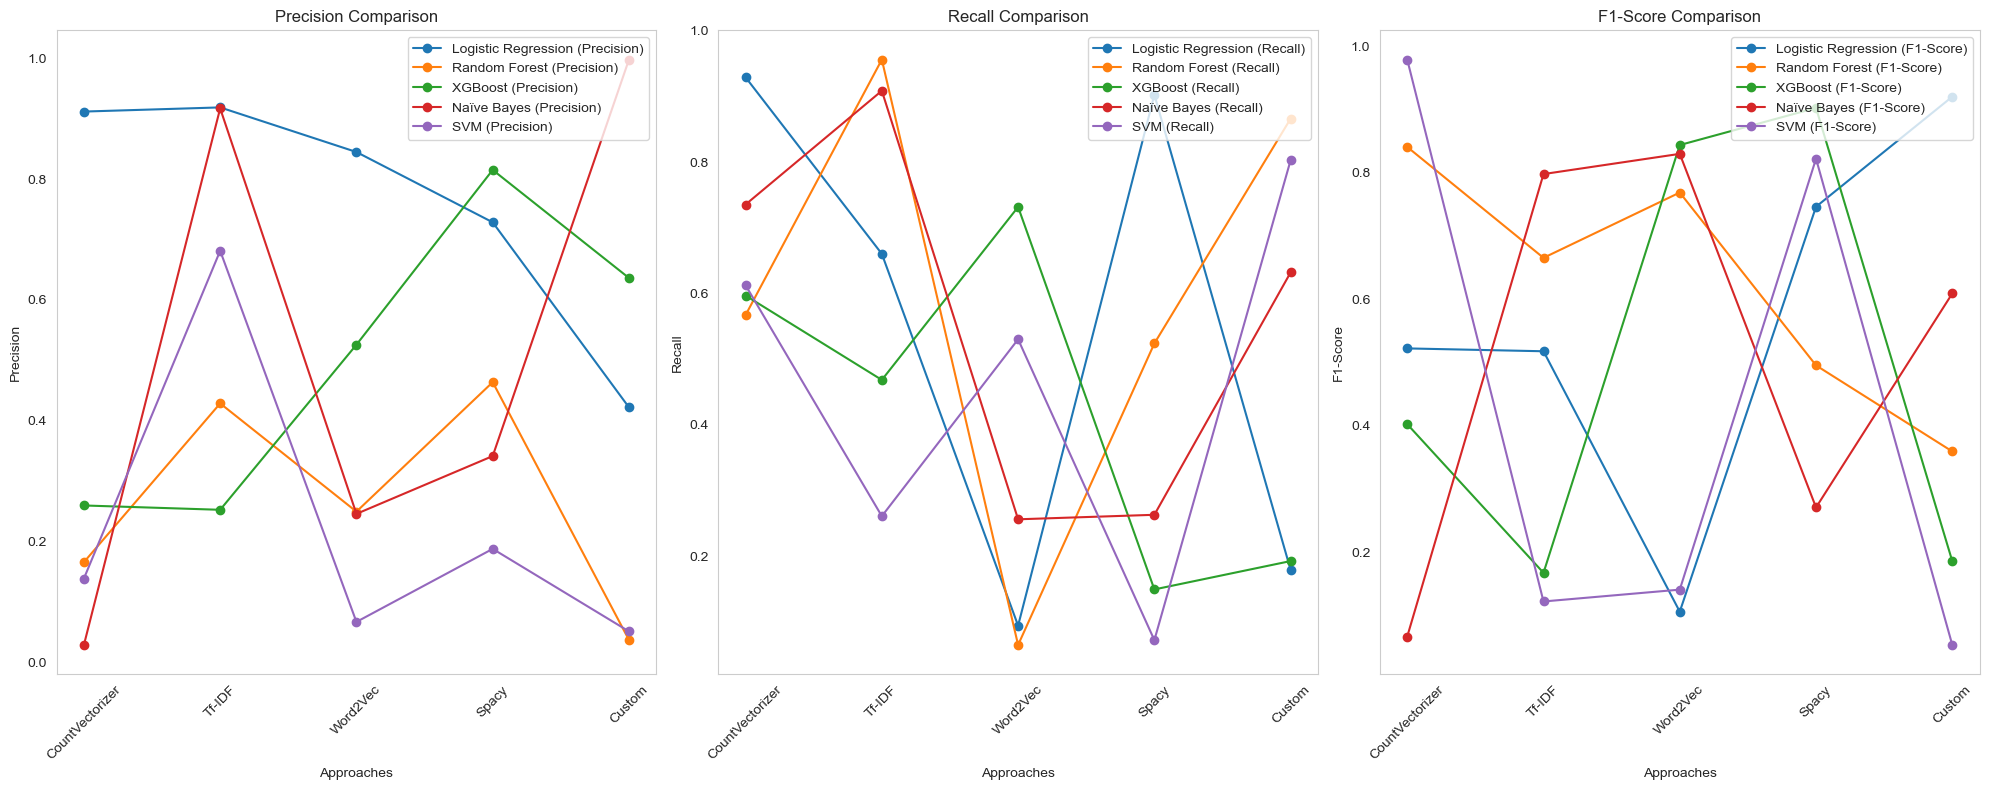

In [129]:
# Example of dummy data
models = [
    "Logistic Regression",
    "Random Forest",
    "XGBoost",
    "Naïve Bayes",
    "SVM"
]

approaches = [
    "CountVectorizer",
    "Tf-IDF",
    "Word2Vec",
    "Spacy",
    "Custom"
]

metrics = ["Precision", "Recall", "F1-Score"]

# Generate dummy data for performance metrics (replace with your real data)
data = np.random.rand(len(models), len(approaches), len(metrics))

# Increase the size of graphics
plt.figure(figsize=(20, 8))

# Stacked Bar Chart
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    bottom = np.zeros(len(models))
    for j, approach in enumerate(approaches):
        plt.bar(models, data[:, j, i], label=approach, bottom=bottom)
        bottom += data[:, j, i]
    plt.title(metric)
    plt.xlabel("Models")
    plt.ylabel(metric)
    plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

# Grouped Bar Chart
plt.figure(figsize=(20, 8))
bar_width = 0.2
for i, approach in enumerate(approaches):
    plt.subplot(1, len(approaches), i + 1)
    width = 0.2
    for j, metric in enumerate(metrics):
        x = np.arange(len(models))
        plt.bar(x + j * width, data[:, i, j], width, label=metric)
    plt.title(approach)
    plt.xlabel("Models")
    plt.ylabel("Scores")
    plt.xticks(x + width * len(metrics) / 2, models, rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(metrics, loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(20, 8))
for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i + 1)
    for j, model in enumerate(models):
        plt.plot(approaches, data[j, :, i], marker='o', label=f"{model} ({metric})")
    plt.title(f"{metric} Comparison")
    plt.xlabel("Approaches")
    plt.ylabel(metric)
    plt.xticks(rotation=45) # Rotate x-axis labels by 45 degrees
    plt.legend(loc='upper right')

# Remove grids
for ax in plt.gcf().get_axes():
    ax.grid(False)

# Set background to white
plt.gca().set_facecolor('white')

plt.tight_layout()
plt.show()